# Programming for Data Science (Enterprise Data Science & Analytics)

## Final project (Group 5)

<a class="anchor" id="Table_Contents"></a>
<b>TABLE OF CONTENTS</b>

* [1. Objectives](#objectives)
<p></p>
* [2. Dataset: Exhibited and Released Films in Portugal (2004/2019)](#ICA)
    * [2.1 Data Understanding](#ICA_understanding)
        * [2.1.1 Collect the Data](#ICA_collect)
        * [2.1.2 Describe the Data](#ICA_describe)
        * [2.1.3 Explore the Data](#ICA_explore)
        * [2.1.4 Verify the Data Quality](#ICA_quality)

    * [2.2 Data Preparation](#ICA_preparation)
<p></p>
* [3. IMDB Web Scraping](#IMDB_scraping)
    * [3.1 Collect the Data](#IMDB_collect)
        * [3.1.1 Web Scraping](#IMDB_collect_scraping)    
        * [3.1.2 Demo](#IMDB_collect_demo)    
        * [3.1.3 Import the scraped data](#IMDB_collect_import)  
    * [3.2 Data Preparation](#IMDB_preparation)
<p></p>
* [4. CINEPT Web Scraping](#CINEPT_scraping)
    * [4.1 Collect the Data](#CINEPT_collect)
        * [4.1.1 Web Scraping](#CINEPT_collect_scraping)    
        * [4.1.2 Demo](#CINEPT_collect_demo)    
        * [4.1.3 Import the scraped data](#CINEPT_collect_import)  
    * [4.2 Data Preparation](#CINEPT_preparation)
<p></p>
* [5. Merging the Datasets](#merging)
    * [5.1 Perform Similarity Analysis](#merging_similarity)
    * [5.2 Check Similarity Results](#merging_similarity_results)
    * [5.3 Append the missing data & highlight PT movies](#merging_fill)
<p></p>
* [6. Data Visualization](#data_visualization)
    * [6.1 Movie Admissions by Year (2004/2017)](#visualization_admissions)
    * [6.2 Portuguese Productions Box Office Hits "Effect" by Year (2004/2017)](#visualization_boxoffice)
<p></p>
* [7. Interpreting Data](#interpreting_data)
    * [7.1 Filtering](#filtering)
        * [7.1.1 Admissions vs Duration](#admissions_duration)
        * [7.1.2 Admissions vs Score](#admissions_score)
        * [7.1.3 Admissions vs GBO](#admissions_GBO)
    * [7.2 Genre Analysis](#genre_analysis)
        * [Key Insights](#genre_insights)    
    * [7.3 Stars Analysis](#stars_analysis)
        * [7.3.1 Network Plot](#network_plot) 
            * [Key Insights](#stars_insights)          
    * [7.4 Directors Analysis](#directors_analysis)
        * [Key Insights](#directors_insights)     
<p></p>
* [8. Conclusions](#conclusions)

<a class="anchor" id="objectives"></a>
## 1 - Objectives

We all know that Portuguese people are often quite hard to please, specially when it comes to things carrying a "made in Portugal" stamp. Portuguese cinema is no exception to this. Our group shares not only a passion for cinema, but also the idea that the Portuguese audience is not particularly enthusiastic about movies made in Portugal. 

On these grounds, we decided to take a deeper look in what drives the success of such movies. Is it the stars? Or maybe the directors? Genre? Or are people influenced by factors such as duration and score?

The following project aims at answering all these questions, using data collected from "Instituto do Cinema e do Audiovisual" (ICA), "Cinema Português" (CinePT) and IMDB.

[Return to Table of Contents](#Table_Contents)

#### Import the Libraries

In [1]:
# Import some standard libraries
import time # count the elapsed time in scraping operations and allow to pause during the scraping process
import re # regular expressions
import datetime # manipulate the datetime object
import pandas as pd
import numpy as np
import scipy as sp # to perform some statistics for box & whiskers plots

import urllib.request  as urlreq # make http requests
import urllib.error as urlerr # for handling error exceptions 
from bs4 import BeautifulSoup # for web scraping

# plots
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import seaborn as sns

#### Set the style of Seaborn plots

In [2]:
sns.set_style('whitegrid',{
    'xtick.bottom': True,
    'xtick.color': '.1',
    'xtick.direction': 'out',
    'xtick.top': False,
    'xtick.major.size': 1,
    'xtick.minor.size': 0.5,
    'ytick.left': True,
    'ytick.color': '.1',
    'ytick.direction': 'out',
    'ytick.right': False,
    'ytick.major.size': 1,
    'ytick.minor.size': 0.5,    
    'ytick.color': '.1',
    'grid.linestyle': '--',
    'axes.edgecolor': '.1',
    'grid.color': '0.8'
 })

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="ICA"></a>
## 2 - Dataset: Exhibited and Released Films in Portugal (2004/2019)

<a class="anchor" id="ICA_understanding"></a>
### 2.1 - Data Understanding

<a class="anchor" id="ICA_collect"></a>
#### 2.1.1 - Collect the Data

Box Office Revenue generated by all exhibited and released films in Portugal (2004/2019).

<img src="images/ICA_Logo.png" alt="Drawing" style="width: 400px;"/>

"The Institute of Cinema and Audiovisual, I. P. - ICA, I. P., is a public institute integrated in the indirect administration of the State, endowed with administrative and financial autonomy and its own heritage, under the Secretary of State for Culture, whose mission is to support the development cinematographic and audiovisual activities."

In [3]:
# Import the dataset (this dataset was obtained by saving a sheet from an Excel file available online)
moviesICA = pd.read_excel('datasets/MoviesPT.xlsx', header = None)

Let's take a first look:

In [4]:
moviesICA.head(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,EXIBIDOS 2004-2019 EXHIBITED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nota | Note: Longas-metragens por ordem alfabé...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atualizado a:,2019-02-01 00:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FONTE,(Tudo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TÍTULO | ORIGINAL TITLE,CÓDIGO IGAC,METRAGEM\nTYPE,REALIZADOR\nDIRECTOR,TIPO\nTYPE,GÉNERO\nGENRE,DATA ESTREIA\nRELEASE DATE,ID Imdb,ISO,DISTRIBUIDOR\nDISTRIBUTOR,ANO EXIBIÇÃO\nEXHIBITION YEAR,Nº SESSÕES\nSCREENINGS,Nº ESPECTADORES\nADMISSIONS,REC BRUTA\nGBO
6,Dom,709/2012,LM,"Luís Pereira, João Traveira",Fic,Drama,2012-07-18 00:00:00,tt3726354,PT,João Eduardo Roque Esteves Traveira,2012,2,5,14
7,Agosto,121/91,LM,Jorge Silva Melo,Fic,Drama,1991-05-10 00:00:00,tt0092522,"PT, FR",NOS Lusomundo Audiovisuais,2015,1,14,31.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
9,#Lingo,90056/2016,CM,Vicente Niro,Anim,Comédia,00:00:00,tt4847606,PT,N/D,2016,1,12,0


##### Fixing the column headers

We began by discarding the first 5 rows in order to adjust the headers, generating a new output table as can be seen below.

In [5]:
# get header values from the 5th index
header = moviesICA.iloc[5]

# rebuild the dataset starting from the 6th index
moviesICA = moviesICA[6:]
moviesICA.rename(columns = header, inplace = True)
moviesICA = moviesICA.reset_index(drop = True)

In [6]:
moviesICA.head()

,TÍTULO | ORIGINAL TITLE,CÓDIGO IGAC,METRAGEM TYPE,REALIZADOR DIRECTOR,TIPO TYPE,GÉNERO GENRE,DATA ESTREIA RELEASE DATE,ID Imdb,ISO,DISTRIBUIDOR DISTRIBUTOR,ANO EXIBIÇÃO EXHIBITION YEAR,Nº SESSÕES SCREENINGS,Nº ESPECTADORES ADMISSIONS,REC BRUTA GBO
0,Dom,709/2012,LM,"Luís Pereira, João Traveira",Fic,Drama,2012-07-18 00:00:00,tt3726354,PT,João Eduardo Roque Esteves Traveira,2012,2,5,14
1,Agosto,121/91,LM,Jorge Silva Melo,Fic,Drama,1991-05-10 00:00:00,tt0092522,"PT, FR",NOS Lusomundo Audiovisuais,2015,1,14,31.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
3,#Lingo,90056/2016,CM,Vicente Niro,Anim,Comédia,00:00:00,tt4847606,PT,N/D,2016,1,12,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,45,0


##### Create a simple header naming

After that we built a dictionary and renamed headers as per table below.

In [7]:
# original headers
old_column_header = moviesICA.columns

# new headers
new_column_header = ['Title', 'IGAC_ID', 'M_Type', 'Director', 'Type', 'Genre', 'Release_Date', 'IMDB_ID',\
                     'Country', 'Distributor', 'Exhibition_Year', 'Screenings', 'Admissions', 'GBO']

column_dict = dict(zip(old_column_header, new_column_header))
moviesICA.rename(columns = column_dict, inplace = True)

In [8]:
moviesICA.head()

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
0,Dom,709/2012,LM,"Luís Pereira, João Traveira",Fic,Drama,2012-07-18 00:00:00,tt3726354,PT,João Eduardo Roque Esteves Traveira,2012,2,5,14
1,Agosto,121/91,LM,Jorge Silva Melo,Fic,Drama,1991-05-10 00:00:00,tt0092522,"PT, FR",NOS Lusomundo Audiovisuais,2015,1,14,31.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
3,#Lingo,90056/2016,CM,Vicente Niro,Anim,Comédia,00:00:00,tt4847606,PT,N/D,2016,1,12,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,45,0


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="ICA_describe"></a>
#### 2.1.2 - Describe the Data

Firstly, we looked at a summary of the dataset.

In [9]:
moviesICA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13245 entries, 0 to 13244
Data columns (total 14 columns):
Title              7641 non-null object
IGAC_ID            7851 non-null object
M_Type             7851 non-null object
Director           7851 non-null object
Type               7855 non-null object
Genre              7878 non-null object
Release_Date       7944 non-null object
IMDB_ID            7949 non-null object
Country            7949 non-null object
Distributor        7958 non-null object
Exhibition_Year    13244 non-null object
Screenings         12978 non-null object
Admissions         13239 non-null object
GBO                12978 non-null object
dtypes: object(14)
memory usage: 1.4+ MB


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="ICA_explore"></a>
#### 2.1.3 - Explore the Data

In an effort to verify the reliability of the dataset we ran some tests.

Do we expect to find records without values on `Admissions`?

In [10]:
# check for missing values on Admissions
moviesICA[moviesICA['Admissions'].isnull()]

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,NaN,NaN
9427,NaN,40004/2018,CM,Bruno de Almeida,Fic,Drama,1994-03-25 00:00:00,tt0106692,"PT, US",N/D,1975-2003,NaN,NaN,NaN
12321,Barronhos,40002/2018,CM,Luís Filipe Rocha,Doc,N/D,1976-06-19 00:00:00,tt0074185,PT,N/D,1975-2003,NaN,NaN,NaN
12322,Benilde ou a Virgem Mãe,379/75,LM,Manoel de Oliveira,Fic,Drama,1975-11-21 00:00:00,tt0072691,PT,NOS Lusomundo Audiovisuais,1975-2003,NaN,NaN,NaN
12325,Cartas na Mesa,484/74,LM,Rogério Ceitil,Fic,Drama,1975-01-06 00:00:00,tt0069849,PT,CLMC - Multimédia,1975-2003,NaN,NaN,NaN
12358,O Assassino da Voz Meiga,40003/2018,CM,Artur Ribeiro,Fic,Comédia,00:00:00,tt0109160,PT,N/D,1975-2003,NaN,NaN,NaN


What about records without `Screenings`?

In [11]:
# check for missing values on Screenings
moviesICA[moviesICA['Screenings'].isnull()]

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6013,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,11000,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,30069,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,19029,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,14400,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,4400,NaN
351,NaN,"395/82, 1253/2018",LM,Paulo Rocha,Fic,"Drama, Romance",1991-03-08 00:00:00,tt0077722,"PT, JP","Atalanta Filmes, Midas Filmes",1975-2003,NaN,4800,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,9900,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,13561,NaN


And records without `GBO`?

In [12]:
# check for missing values on GBO
moviesICA[moviesICA['GBO'].isnull()]

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6013,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,11000,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,30069,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,19029,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,14400,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,4400,NaN
351,NaN,"395/82, 1253/2018",LM,Paulo Rocha,Fic,"Drama, Romance",1991-03-08 00:00:00,tt0077722,"PT, JP","Atalanta Filmes, Midas Filmes",1975-2003,NaN,4800,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,9900,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,13561,NaN


These tests revealed a pattern: all nulls happen when `Exhibition_Year` is equal to 1975-2003.

In [13]:
# filter out the dataset where Exhibition_Year is in between 1975 and 2003
moviesICA[moviesICA['Exhibition_Year'] == '1975-2003']

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6200,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,6013,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,11000,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,30069,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,19029,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,14400,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,4400,NaN
351,NaN,"395/82, 1253/2018",LM,Paulo Rocha,Fic,"Drama, Romance",1991-03-08 00:00:00,tt0077722,"PT, JP","Atalanta Filmes, Midas Filmes",1975-2003,NaN,4800,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,9900,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-2003,NaN,13561,NaN


In [14]:
# check for missing values on Exhibition_Year
moviesICA[moviesICA['Exhibition_Year'].isnull()]

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
5,$ 9.99,1064/2009,LM,Tatia Rosenthal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,363,1410.6


##### Explore IMDB_ID records

The scraping method for IMDB data will be based on the field `IMDB_ID`.Once again, we checked the reliability of the data.

In [15]:
moviesICA['IMDB_ID'].value_counts().head(n = 10)

(em branco)    233
0              226
tt0299478        3
tt5282462        3
tt0120809        3
tt0062622        2
tt2027262        2
tt0052357        2
tt0046511        2
tt0041931        2
Name: IMDB_ID, dtype: int64

It appears the IMDB identification codes follow the same naming format: e.g. tt0000000

##### Create a list of invalid IMDB_ID records

Records that do not match the IMDB specific format (filtering the ones not starting with 'tt') were stored in a separate dataset.

In [16]:
invalid_imdb_id_series = moviesICA[~moviesICA['IMDB_ID'].astype('str').str.\
                                   startswith('tt', na = True)]['IMDB_ID'].value_counts()

invalid_imdb_id = invalid_imdb_id_series.index.tolist()
print(invalid_imdb_id)

['(em branco)', 0, 'Herzog - Sessão III', 'Herzog - Sessão V']


##### Are there any "null" `IMDB_ID` with an associated `Title`?

In [17]:
moviesICA[(moviesICA['Title'].notna()) & (moviesICA['IMDB_ID'].isnull())]

,Title,IGAC_ID,M_Type,Director,Type,Genre,Release_Date,IMDB_ID,Country,Distributor,Exhibition_Year,Screenings,Admissions,GBO
5,$ 9.99,1064/2009,LM,Tatia Rosenthal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,363,1410.6


We could only find one record without `IMDB_ID`.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="ICA_quality"></a>
#### 2.1.4 - Verify the Data Quality

- Records without values on `Admission` were successfully excluded.
- Records from 1975 to 2003 were also excluded from our analysis.
- IMDB identification codes, `IMDB_ID` should have a valid format (tt0000000). All values that do not match this format will block the web scraping and, therefore, were excluded from our analysis.
- Similarly, records without year of exhibition (`Exhibition_Year`) were excluded.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="ICA_preparation"></a>
### 2.2 - Data Preparation

#### Drop unnecessary column(s)

In [18]:
remove_columns = ['Title', 'IGAC_ID', 'Distributor', 'Country', 'M_Type', 'Director', 'Type', 'Genre', 'Release_Date']
moviesICA.drop(remove_columns, axis = 1, inplace = True)

#### Drop records without values on `Admissions`
Since we are not interested in records without any values on `Admissions`, these were excluded.

In [19]:
moviesICA.dropna(subset = ['Admissions'], inplace = True)

#### Delete records for `Exhibition_Year` is between 1975 - 2003

Also, we excluded records from `Exhibition_Year` between 1975 to 2003.

In [20]:
moviesICA = moviesICA[moviesICA['Exhibition_Year'] != '1975-2003']

#### Delete records without `Exhibition_Year`
Moreover, we excluded records without `Exhibition_Year`.

In [21]:
moviesICA.dropna(subset = ['Exhibition_Year'], inplace = True)

#### Drop records with invalid `IMDB_ID` values

Finally, records with invalid `IMDB_ID` were also excluded.

In [22]:
moviesICA = moviesICA[~moviesICA['IMDB_ID'].isin(invalid_imdb_id)]

#### Fill missing values based on the previous records (Forward Filling)

In [23]:
moviesICA.fillna(method = 'ffill', inplace = True)

In [24]:
moviesICA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12516 entries, 0 to 13244
Data columns (total 5 columns):
IMDB_ID            12516 non-null object
Exhibition_Year    12516 non-null int64
Screenings         12516 non-null int64
Admissions         12516 non-null int64
GBO                12516 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 586.7+ KB


In [25]:
moviesICA.head(n = 10)

,IMDB_ID,Exhibition_Year,Screenings,Admissions,GBO
0,tt3726354,2012,2,5,14.00
1,tt0092522,2015,1,14,31.50
3,tt4847606,2016,1,12,0.00
4,tt4847606,2017,1,45,0.00
6,tt4732508,2008,1,15,15.00
7,tt4732508,2012,1,120,0.00
8,tt0120798,2004,12,29,113.00
9,tt0120798,2013,1,46,8.00
11,tt0259822,2007,348,2471,9983.98
12,tt0259822,2008,7,21,70.50


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="IMDB_scraping"></a>
## 3 - IMDB Web Scraping

At this point we decided to complement the previous dataset with the information available on IMDB since we already had the value of the `IMDB_ID` for each record.

### What is IMDb?

<img src="images/IMDB_Logo.png" alt="Drawing" style="width: 200px;"/>

"IMDb is the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch.

Our searchable database includes millions of movies, TV and entertainment programs and cast and crew members. We help you jog your memory about a movie, show, or person on the tip of your tongue, find the best movie or show to watch next, and empower you to share your entertainment knowledge and opinions with the world’s largest community of fans."

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="IMDB_collect"></a>
### 3.1 - Collect the Data

<a class="anchor" id="IMDB_collect_scraping"></a>
#### 3.1.1 - Web Scraping

At this point we would like to highlight that the Notebook might take a while to run the following function. Hence, we created below a demo of the function to show how it works on a small subset of records below.

In [26]:
def imdb_scraping(id_list):
    '''This function performs the web scrapping from IMDB to retrieve the movie Title, Release Year,\
    Release Date in Portugal, Score, Genre, Directors, Starts and Runtime given a list of movies IDs to search for'''
    start_time = time.time()
    
    # create the lists to build the dataset afterwards
    IMDB_id = []
    IMDBtitle = []
    IMDByear = []
    IMDByear_pt = []
    IMDBscore = []
    IMDBgenres = []
    IMDBdirectors = []
    IMDBstars = []
    IMDBruntime = []
    
    # iterate through each element in the list (from the input list)
    for imdb_id in id_list:
        
        # create some auxiliary variables to initialize with null values 
        # (they will be used to ensure that an empty value will be appended for each element and a dataset with the
        # same number of rows as the input list will be returned by this function)
        IMDB_id_temp = imdb_id
        IMDB_url= 'https://www.imdb.com/title/' + IMDB_id_temp + '/' # build the url for scraping

        IMDBtitle_temp = ''
        IMDByear_temp = ''
        RatingValue_temp = ''
        list_Directors_temp = []
        list_Starts_temp = []
        Release_info_temp = ''
        list_Genre_temp = []
        runtime_temp = ''
        error_bool = False

        # open the html web page
        try: page = urlreq.urlopen(IMDB_url)
        except urlerr.URLError as e:
            print(e.reason)
            error_bool = True

        if(error_bool == False):
            # parse the html web page using BeautifulSoup
            soup = BeautifulSoup(page, 'html.parser', from_encoding = 'utf-8')   

            # get the relevant fields
            # scrap the movie Title(h1) and the Release Year(titleYear)
            IMDBtitle_temp = re.sub('\xa0', '', soup.h1.find(text = True, recursive = False))

            if(soup.find('span', {'id': 'titleYear'}) != None):
                IMDByear_temp = soup.find('span', {'id': 'titleYear'}).a.text

            # scrap the Score(ratingValue)
            if(soup.find('span', attrs = {'itemprop': 'ratingValue'}) != None):
                RatingValue_temp = re.sub('\s+', '', soup.find('span', attrs = {'itemprop': 'ratingValue'}).get_text())

            # scrap the Directors & Stars: they are arranged in similar html nodes
            credit_summary = soup.find_all('div', attrs = {'class': 'credit_summary_item'})
            for div in credit_summary:
                h4 = div.find('h4', attrs = {'class': 'inline'}).get_text()

                # get the list of directors (iterate through all elements)
                if('Director' in h4):
                    for a in div.find_all('a'):
                        list_Directors_temp.append(a.get_text())

                # get the list of stars (iterate through all elements): consider only the main stars
                elif('Stars' in h4):
                    for a in div.find_all('a'):
                        if('See full' not in a.get_text()): # remove the link to see full list of stars
                            list_Starts_temp.append(a.get_text())

            # scrap the Release Date in Portugal (release info) & Genres(genres): they are arranged
            # in similar html nodes
            subtext = soup.find('div', attrs = {'class': 'subtext'})
            for a in subtext.find_all('a'):
                if('genres' in a.get('href')): # the genres are under the href tag
                    list_Genre_temp.append(a.get_text())
                elif('releaseinfo' in a.get('href')): # the releaseinfo is under the href tag
                    Release_info_temp = a.get_text().split('(')[0].strip()
            
            # scrap the Runtime(time) from the Technical Specs
            txt_block = soup.find_all('div', attrs = {'class': 'txt-block'}) # the div where all specs are stored
            for div in txt_block:
                h4 = div.find('h4', attrs = {'class': 'inline'}) # the header where the Runtime value is stored
                if(h4 != None):
                    if('Runtime' in h4.get_text()):
                        runtime_temp = div.find('time').get_text()
        
        # append all the auxiliary variables to the lists
        IMDB_id.append(IMDB_id_temp)
        IMDBtitle.append(IMDBtitle_temp)
        IMDByear.append(IMDByear_temp)
        IMDByear_pt.append(Release_info_temp)
        IMDBscore.append(RatingValue_temp)
        IMDBgenres.append(list_Genre_temp)
        IMDBdirectors.append(list_Directors_temp)
        IMDBstars.append(list_Starts_temp)
        IMDBruntime.append(runtime_temp)

        # Wait for 100 milliseconds (prevent the site to interrupt the process)
        time.sleep(.100)

    elapsed_time = time.time() - start_time
    print('ElapsedTime ' + time.strftime('%H:%M:%S', time.gmtime(elapsed_time)))
    
    # build the pandas DataFrame from the lists
    global moviesIMDB
    moviesIMDB = pd.DataFrame(
        {'IMDB_ID': IMDB_id,
         'Title': IMDBtitle,
         'Year': IMDByear,
         'YearPT': IMDByear_pt,
         'Score': IMDBscore,
         'Genre': IMDBgenres,
         'Directors': IMDBdirectors,
         'Stars': IMDBstars,
         'Duration': IMDBruntime
        })
    return moviesIMDB # return the DataFrame

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="IMDB_collect_demo"></a>
#### 3.1.2 - Demo

In [27]:
scraping_id = list(moviesICA['IMDB_ID'].unique()[0:3])

print(scraping_id, '\n')

imdb_scraping(scraping_id)

['tt3726354', 'tt0092522', 'tt4847606'] 

ElapsedTime 00:00:16


,IMDB_ID,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration
0,tt3726354,Dom,2012,18 July 2012,,[Drama],"[Luís Pereira, João Traveira]",[],102 min
1,tt0092522,Agosto,1988,10 May 1991,6.5,[Drama],[Jorge Silva Melo],"[Christian Patey, Olivier Cruveiller, Marie Ca...",97 min
2,tt4847606,#Lingo,2015,27 October 2015,7.0,"[Animation, Short, Comedy]",[Vicente Niro],"[Vicente Niro, Raquel Fernandes]",11 min


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="IMDB_collect_import"></a>
#### 3.1.3 - Import the scraped data

This data was obtained by running the previous function for the entire set of records, so let's import the dataset.

In [28]:
moviesIMDB = pd.read_csv('datasets/Movies_IMDB.csv', sep = ';', encoding = 'utf-8')
moviesIMDB.head()

,IMDB_ID,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration
0,tt0003419,Der Student von Prag,1913.0,22 August 1913,6.6,"['Drama', 'Fantasy', 'Horror']","['Paul Wegener', 'Stellan Rye']","['Paul Wegener', 'Grete Berger', 'Lyda Salmono...",41 min
1,tt0004707,As Bodas de Charlot,1914.0,21 December 1914,7.0,['Comedy'],"['Mack Sennett', 'Charles Bennett']","['Charles Chaplin', 'Marie Dressler', 'Mabel N...",74 min
2,tt0006414,Charlot Maquinista,1916.0,13 November 1916,7.0,"['Short', 'Comedy', 'Romance']",['Charles Chaplin'],"['Charles Chaplin', 'Edna Purviance', 'Eric Ca...",23 min
3,tt0007880,Charlot na Rua da Paz,1917.0,22 January 1917,7.6,"['Short', 'Comedy']",['Charles Chaplin'],"['Charles Chaplin', 'Edna Purviance', 'Eric Ca...",23 min
4,tt0009193,O Homem dos Olhos Tortos,1918.0,NaN,6.1,"['Crime', 'Thriller']",['José Leitão de Barros'],"['Raquel Barros', 'Alda de Aguiar', 'Raul de O...",92 min


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="IMDB_preparation"></a>
### 3.2 - Data Preparation

In [29]:
moviesIMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 9 columns):
IMDB_ID      7175 non-null object
Title        7170 non-null object
Year         7146 non-null float64
YearPT       7087 non-null object
Score        6839 non-null float64
Genre        7175 non-null object
Directors    7175 non-null object
Stars        7175 non-null object
Duration     6503 non-null object
dtypes: float64(2), object(7)
memory usage: 504.6+ KB


In [30]:
def unique(list_in):
    '''This function returns the unique values from an input list, respecting their order on the list and removing 
    leading or trailing space characters from the values'''
    list_aux = [x.strip() for x in list_in] # remove leading or trailing space characters
    set_uniques = set() # convert the list to a set (eliminate duplicates)
    
    # iterate through each element in the input list and return only the ones in the set (unique values)
    return [x for x in list_aux if not (x in set_uniques or set_uniques.add(x))] 

In [31]:
# field Title
# remove leading or trailing space characters
moviesIMDB['Title'] = moviesIMDB['Title'].astype(str)
moviesIMDB['Title'] = moviesIMDB['Title'].map(lambda x: None if ((x == 'NaN') | (x == 'nan')) else x.strip())


# field Year
# convert to a string and remove the .0 (this field was converted to float64 to accommodate having NaNs)
moviesIMDB['Year'] = moviesIMDB['Year'].astype(str)
moviesIMDB['Year'] = moviesIMDB['Year'].map(lambda x: None if ((x == 'NaN') | (x == 'nan')) else x.split('.')[0])


# field YearPT
# this field can have several different formats in the source, so we need to convert it to a datetime object
moviesIMDB['YearPT'] = moviesIMDB['YearPT'].astype(str)
YearPT_dt = []

for value in (moviesIMDB['YearPT']):
    YearPT_temp = ''
        
    # if not NaN search for specific patterns in the value that are related to datetime formats
    if not ((value == 'NaN') | (value == 'nan')):

        # full pattern: Day(%d) Month(%B) Year(%Y)
        pat_full = re.search(\
         r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',\
         value)

        if(bool(pat_full)):
            if(pat_full.span()[0] >= 0):
                YearPT_temp = datetime.datetime.strptime(value[pat_full.span()[0]:].strip(), '%d %B %Y')

        # intermediate pattern: Month(%B) Year(%Y)
        else:
            pat_int = re.search(\
             r'\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',\
             value)
            
            if(bool(pat_int)):
                if(pat_int.span()[0] >= 0):
                    YearPT_temp = datetime.datetime.strptime(value[pat_int.span()[0]:].strip(), '%B %Y')

            # small pattern: Year(%Y)
            else:            
                pat_small = re.search(r'\d{4}', value)

                if(bool(pat_small)):
                    if(pat_small.span()[0] >= 0):
                        YearPT_temp = datetime.datetime.strptime(value[pat_small.span()[0]:].strip(), '%Y')
    
    if(YearPT_temp == ''):
        YearPT_dt.append(None)
    else:
        YearPT_dt.append(YearPT_temp)
                        
moviesIMDB['YearPT_dt'] = YearPT_dt
     
    
# field Duration
# extract the minutes and convert it to a numeric format (int32)
moviesIMDB['Duration'] = moviesIMDB['Duration'].astype(str)
moviesIMDB['Duration'] = moviesIMDB['Duration'].map(lambda x: np.nan if ((x == 'NaN') | (x == 'nan')) else\
                                   (np.int32(x[0:re.search('min', x).span()[0] - 1])))


# field Genre
# convert all genres to a single list (remove lists of lists)                                             
aux_Genre_str = pd.Series(moviesIMDB['Genre'].astype(str).str.replace('\[|\]|\'|\"', ''))
aux_Genre_list = aux_Genre_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else x[:].split(','))

# remove duplicates
aux_Genre_list_uniques = aux_Genre_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else unique(x))
moviesIMDB['Genre'] = aux_Genre_list_uniques


# field Directors
# convert all directors to a single list (remove lists of lists)  
aux_Directors_str = pd.Series(moviesIMDB['Directors'].astype(str).str.replace('\[|\]|\'|\"', ''))
aux_Directors_list = aux_Directors_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else x[:].split(','))

# remove duplicates
aux_Directors_list_uniques = aux_Directors_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else unique(x))

# remove the more credit items inside the list (remove lists of lists)  
aux_Directors_list_uniques_filt = aux_Directors_list_uniques.map(lambda x: \
                                                                 [value for value in x if 'more credit' not in value])
moviesIMDB['Directors'] = aux_Directors_list_uniques_filt


# field Stars
# convert all stars to a single list (remove lists of lists)  
aux_Stars_str = pd.Series(moviesIMDB['Stars'].astype(str).str.replace('\[|\]|\'|\"', ''))
aux_Stars_list = aux_Stars_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else x[:].split(','))

# remove duplicates
aux_Stars_list_uniques = aux_Stars_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else unique(x))
moviesIMDB['Stars'] = aux_Stars_list_uniques

In [32]:
moviesIMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 10 columns):
IMDB_ID      7175 non-null object
Title        7170 non-null object
Year         7146 non-null object
YearPT       7175 non-null object
Score        6839 non-null float64
Genre        7175 non-null object
Directors    7175 non-null object
Stars        7175 non-null object
Duration     6503 non-null float64
YearPT_dt    7069 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 560.6+ KB


In [33]:
moviesIMDB.head()

,IMDB_ID,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration,YearPT_dt
0,tt0003419,Der Student von Prag,1913,22 August 1913,6.6,"[Drama, Fantasy, Horror]","[Paul Wegener, Stellan Rye]","[Paul Wegener, Grete Berger, Lyda Salmonova]",41.0,1913-08-22
1,tt0004707,As Bodas de Charlot,1914,21 December 1914,7.0,[Comedy],"[Mack Sennett, Charles Bennett]","[Charles Chaplin, Marie Dressler, Mabel Normand]",74.0,1914-12-21
2,tt0006414,Charlot Maquinista,1916,13 November 1916,7.0,"[Short, Comedy, Romance]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1916-11-13
3,tt0007880,Charlot na Rua da Paz,1917,22 January 1917,7.6,"[Short, Comedy]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1917-01-22
4,tt0009193,O Homem dos Olhos Tortos,1918,nan,6.1,"[Crime, Thriller]",[José Leitão de Barros],"[Raquel Barros, Alda de Aguiar, Raul de Oliveira]",92.0,NaT


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="CINEPT_scraping"></a>
## 4 - CINEPT Web Scraping

### What is CINEPT?

<img src="images/CinePT_Logo.png" alt="Drawing" style="width: 710px;"/>

This is an academic project covering a movie database only for the Portuguese movies available on http://www.cinept.ubi.pt/pt/.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="CINEPT_collect"></a>
### 4.1 - Collect the Data

<a class="anchor" id="CINEPT_collect_scraping"></a>
#### 4.1.1 - Web Scraping

Again we would like to highlight that the Notebook might take a while to run the following functions. Hence, we created below a small demo of the functions to show how they work on a small subset of records.

For the CINEPT the first thing that we need to do is go through the several pages of the index to get a list of the Portuguese movies.

In [34]:
def cinept_scraping_index(pages):
    '''This function performs the web scrapping from CINEPT to retrieve a list of movies with the Title, Url and 
    Release Year going through the different pages of the index'''
    start_time = time.time()
    
    site_url = 'http://www.cinept.ubi.pt/pt/filmes/p/' # base url to go the index
    # create the lists to build the dataset afterwards
    MovieTitle = []
    MovieUrl = []
    MovieYear = []

    # iterate through each page from the website
    for p in range(1, pages + 1):

        # build the url for scraping
        page_url = site_url + str(p)

        # open the html web page
        page = urlreq.urlopen(page_url)

        # parse the html web page using BeautifulSoup
        soup = BeautifulSoup(page, 'html.parser', from_encoding = 'utf-8')

        # get the object associated to the tag lista (where the movie list is detailed)
        lista = soup.find('ul', attrs = {'class': 'lista'})

        # iterate through each a element of lista
        for a in lista.find_all('a'):

            # get the attribute href associated to the url for further movie details (create a full path)
            MovieUrl.append(page_url[0:page_url.find('/', 8, len(page_url))] + a.get('href'))

            # get the text of the element associated to the Title & Year fields
            str_TitYear = re.sub(r'\s\s+', '', a.get_text())

            # extract the string in between brackets (Year)
            span = re.search(r'\(\S{4}\)', str_TitYear).span()
            if (span[1]-1 > span[0] + 1):
                MovieYear.append(str_TitYear[span[0] + 1:span[1]-1])

            # extract the Title field 
            if(MovieYear[-1] == ''):
                MovieTitle.append(str_TitYear)
            else:
                MovieTitle.append(str_TitYear[0:span[0]])

    elapsed_time = time.time() - start_time
    print('ElapsedTime ' + time.strftime('%H:%M:%S', time.gmtime(elapsed_time)))
    
    # build the pandas DataFrame from the Lists
    global moviesCINEPT_index
    moviesCINEPT_index = pd.DataFrame(
        {'URL': MovieUrl,
         'Title': MovieTitle,
         'Year': MovieYear
        })
    return moviesCINEPT_index # return the DataFrame

Then, we created another function to get specific details for each movie on the index list.

In [35]:
def cinept_scraping_details(movies_df):
    '''This function performs the web scrapping from CINEPT to retrieve the details of each movie like the
    Classification, Duration, Genre, Directors, Writers, Cast and TechCrew from a DataFrame with the urls
    to scrap the details for each movie'''
    start_time = time.time()
    
    # create the lists to build the dataset afterwards
    MovieURL = []
    MovieClassification = []
    MovieDuration = []
    MovieGenre = []
    MovieDirectors = []
    MovieWriters = []
    MovieCast = []
    MovieTechCrew = []
    
    # iterate through each movie from the input DataFrame
    for index, page_url in movies_df['URL'].iteritems():
        
        # save the Url
        MovieURL.append(page_url)

        # open the html web page
        page = urlreq.urlopen(page_url)

        # parse the html web page using BeautifulSoup
        soup = BeautifulSoup(page, 'html.parser', from_encoding = 'utf-8')

        # get the relevant fields
        # throughout this process some auxiliary variables will be used (initialized with null values) to ensure
        # that the dataset returned will have the same number of rows        
        
        # scrap the Classification(classificacao)
        Classification_temp = ''
        if(soup.find('p', attrs = {'class': 'classificacao'}) != None):
            Classification_temp = re.sub('\s+', '', soup.find('p', attrs = {'class': 'classificacao'}).get_text())

        MovieClassification.append(Classification_temp)

        # scrap the Duration(minutos) & Genre(genero)
        minutos = soup.find_all('p', attrs = {'class': 'minutos'}) # get all p elements from class: minutos
        Duration_temp = ''
        lits_Genre_temp = []
        for p in minutos: # iterate through each p element

            # identify the element associated to the movie duration
            if (('min' in p.get_text()) | (bool(re.search('([0-9][0-9])s', p.get_text())))):
                Duration_temp = p.get_text()

            # identify the element associated to the movie genre
            elif(p.find_all('a', href = lambda href: href and 'genero' in href) != []):
                for a in p.find_all('a'): # iterate through all p elements from a
                    lits_Genre_temp.append(a.get_text())

        MovieDuration.append(Duration_temp)
        MovieGenre.append(lits_Genre_temp)

        # scrap the list of Directors(Realização) & Writers(Argumento)
        spans = soup.find_all('span') # get all span elements
        listDirectors_temp = []
        directors_bool = False
        listWriters_temp = []
        writers_bool = False

        for span in spans: # iterate through each span element from spans

            # get the first element associated to the Directors field
            if((directors_bool == False) & (span.text == 'Realização:')):

                # get the parent p element
                directors_bool = True
                p = span.parent # get all p elements from span
                for a in p.find_all('a'): # iterate through all a elements from p
                    listDirectors_temp.append(a.get_text())  

            # get the first element associated to the Writers field
            elif((writers_bool == False) & (span.text == 'Argumento:')):

                # get the parent p element
                writers_bool = True
                p = span.parent
                for a in p.find_all('a'): # iterate through all a elements from p
                    listWriters_temp.append(a.get_text()) 

        MovieDirectors.append(listDirectors_temp)
        MovieWriters.append(listWriters_temp)

        # Cast(Elenco) & TechnicalCrew(técnica)
        listCast_temp = []
        dictTechCrew_temp = {}
        listTechCrew_temp = []

        titulos = soup.find_all('div', attrs = {'class': 'titulo'}) # get all div elements from class titulo          
        for div in titulos: # iterate through all div elements
            if(div.span != None):

                # Cast
                if('Elenco' in div.span.text):

                    # get the parent ul element
                    ul = div.parent # get all ul elements from div
                    for li in ul: # iterate through all li elements in ul
                        if(li.a != None):
                            listCast_temp.append(li.a.get_text())

                # TechnicalCrew
                elif('técnica' in div.span.text):

                    # get the parent ul element
                    ul = div.parent # get all ul elements from div
                    for p in ul.find_all('p', attrs = {'class': 'ocupacoes'}): # iterate through all p elements in ul

                        # avoid repeating the same fields already gathered before
                        if((p.span.get_text() != 'Realização:') & (p.span.get_text() != 'Argumento:')):

                            # build a dictionary for every team member
                            # get the key
                            key = p.span.get_text()[:-1]
                            dictTechCrew_temp[key] = []
                            listTechCrew_temp = []

                            # get the value
                            for a in p: # iterate through all a elements from p
                                if(a.string == None):
                                    break
                                else:
                                    if((':' not in str(a.string)) & (a.string[0] != '[') & (a.string[0] != ' ')\
                                       & ('\xa0' not in str(a.string))):
                                        listTechCrew_temp.append(a.string)

                            dictTechCrew_temp[key].append(listTechCrew_temp)

        MovieCast.append(listCast_temp)
        MovieTechCrew.append(dictTechCrew_temp)

    elapsed_time = time.time() - start_time
    print('ElapsedTime ' + time.strftime('%H:%M:%S', time.gmtime(elapsed_time)))
    
    # build the pandas DataFrame from the lists
    global moviesCINEPT_detail
    moviesCINEPT_detail = pd.DataFrame(
        {'URL': MovieURL,
         'Classification': MovieClassification,
         'Duration': MovieDuration,
         'Genre': MovieGenre,
         'Directors': MovieDirectors,
         'Writers': MovieWriters,
         'Cast': MovieCast,
         'TechCrew': MovieTechCrew
        })
    
    return moviesCINEPT_detail # return the DataFrame

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="CINEPT_collect_demo"></a>
#### 4.1.2 - Demo

In [36]:
cinept_scraping_index(1)
cinept_scraping_details(moviesCINEPT_index)

ElapsedTime 00:00:01
ElapsedTime 00:00:37


,URL,Classification,Duration,Genre,Directors,Writers,Cast,TechCrew
0,http://www.cinept.ubi.pt/pt/filme/10676/Dia+de...,N/C,17 min,[Curta-metragem],[Sofia Bost],[Tiago Bastos Capitão],"[Fernanda Neves, Mariana Silva, Melissa Matos,...","{'Assistente de Realização': [[Luís Nunes]], '..."
1,http://www.cinept.ubi.pt/pt/filme/10672/Hotel+...,M/14,82 min,[Drama],[Ivo M. Ferreira],"[Ivo M. Ferreira, Edgar Medina]","[Cândido Ferreira, Eliz Lao, Kwok-Leung Gan, M...","{'Assistente de Realização': [[Tracy Choi, Emí..."
2,http://www.cinept.ubi.pt/pt/filme/10669/Antec%...,N/C,52 min,[Documentário],[Jorge Cramez],[],[],"{'Assistente de Montagem': [[José Rito]], 'Ass..."
3,http://www.cinept.ubi.pt/pt/filme/10668/Actos+...,N/C,116 min,[Documentário],[Jorge Cramez],[],[],{'Apoio Financeiro': [[Fundação Kalouste Gulbe...
4,http://www.cinept.ubi.pt/pt/filme/10667/A+Era+...,N/C,5m 38s,[Animação],"[Sara Augusto, Eva Mendes, Joana de Rosa]",[Eva Mendes],[],"{'Animação': [[Sara Augusto]], 'Cenografia': [..."
5,http://www.cinept.ubi.pt/pt/filme/10666/Magister,N/C,20 min,[Curta-metragem],[Gustavo dos Santos],[],[],{'Produção Executiva': [[Júlio Filipe Cardoso]]}
6,http://www.cinept.ubi.pt/pt/filme/10662/No+Por...,N/C,27 min,[Documentário],[Renata Sancho],[],[],{'Apoio Financeiro': [[Fundação Calouste Gulbe...
7,http://www.cinept.ubi.pt/pt/filme/10661/A+Port...,M/12,136 min,"[Drama, História]",[Rita Azevedo Gomes],[Rita Azevedo Gomes],"[Adelaide Teixeira, Alexandre Alves Costa, Cla...","{'Apoio Financeiro': [[RTP, ICA - Instituto do..."
8,http://www.cinept.ubi.pt/pt/filme/10660/Snu,M/12,93m 51s,[Romance],[Patrícia Sequeira],"[Claudia Clemente, Patrícia Sequeira]","[Ana Nave, André Carvalho, Beatriz Leonardo, I...","{'Assistente de Câmara': [[Ricardo Simoes, Ric..."
9,http://www.cinept.ubi.pt/pt/filme/10659/Pedro+...,M/12,120 min,[Drama],[António Ferreira],"[António Ferreira, Rosa Lobato Faria]","[Berta Susana Teixeira, Cristovão Campos, Cust...","{'Caracterização': [[Silvia Grabowski]], 'Cast..."


##### Join the two datasets from the web scraping of CINEPT 

In [37]:
moviesCINEPT = pd.merge(moviesCINEPT_index, moviesCINEPT_detail, how ='left', left_on = 'URL', right_on = 'URL')
moviesCINEPT.head()

,URL,Title,Year,Classification,Duration,Genre,Directors,Writers,Cast,TechCrew
0,http://www.cinept.ubi.pt/pt/filme/10676/Dia+de...,Dia de Festa,2019,N/C,17 min,[Curta-metragem],[Sofia Bost],[Tiago Bastos Capitão],"[Fernanda Neves, Mariana Silva, Melissa Matos,...","{'Assistente de Realização': [[Luís Nunes]], '..."
1,http://www.cinept.ubi.pt/pt/filme/10672/Hotel+...,Hotel Império,2018,M/14,82 min,[Drama],[Ivo M. Ferreira],"[Ivo M. Ferreira, Edgar Medina]","[Cândido Ferreira, Eliz Lao, Kwok-Leung Gan, M...","{'Assistente de Realização': [[Tracy Choi, Emí..."
2,http://www.cinept.ubi.pt/pt/filme/10669/Antec%...,Antecâmara,2018,N/C,52 min,[Documentário],[Jorge Cramez],[],[],"{'Assistente de Montagem': [[José Rito]], 'Ass..."
3,http://www.cinept.ubi.pt/pt/filme/10668/Actos+...,Actos de Cinema,2018,N/C,116 min,[Documentário],[Jorge Cramez],[],[],{'Apoio Financeiro': [[Fundação Kalouste Gulbe...
4,http://www.cinept.ubi.pt/pt/filme/10667/A+Era+...,A Era das Ovelhas,2018,N/C,5m 38s,[Animação],"[Sara Augusto, Eva Mendes, Joana de Rosa]",[Eva Mendes],[],"{'Animação': [[Sara Augusto]], 'Cenografia': [..."


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="CINEPT_collect_import"></a>
#### 4.1.3 - Import the scraped data

In [38]:
# import the movies dataset previously obtained by running the previous lines of code with all records
moviesCINEPT = pd.read_csv('datasets/CINEPT.csv', sep = ';', encoding = 'utf-8')
moviesCINEPT.head()

,Title,Year,Classification,Duration,Genre,Directors,Writers,Cast,TechCrew
0,Antecâmara,2018,N/C,52 min,['Documentário'],['Jorge Cramez'],[],[],"{'Assistente de Montagem': [['José Rito']], 'A..."
1,Actos de Cinema,2018,N/C,116 min,['Documentário'],['Jorge Cramez'],[],[],{'Apoio Financeiro': [['Fundação Kalouste Gulb...
2,A Era das Ovelhas,2018,N/C,5m 38s,['Animação'],"['Sara Augusto', 'Eva Mendes', 'Joana de Rosa']",['Eva Mendes'],[],"{'Animação': [['Sara Augusto']], 'Cenografia':..."
3,Magister,2018,N/C,20 min,['Curta-metragem'],['Gustavo dos Santos'],[],[],{'Produção Executiva': [['Júlio Filipe Cardoso...
4,No Porto de Leixões - Panorama,2018,N/C,27 min,['Documentário'],['Renata Sancho'],[],[],{'Apoio Financeiro': [['Fundação Calouste Gulb...


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="CINEPT_preparation"></a>
### 4.2 - Data Preparation

In [39]:
moviesCINEPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562 entries, 0 to 10561
Data columns (total 9 columns):
Title             10562 non-null object
Year              10562 non-null object
Classification    1671 non-null object
Duration          4987 non-null object
Genre             10562 non-null object
Directors         10562 non-null object
Writers           10562 non-null object
Cast              10562 non-null object
TechCrew          10562 non-null object
dtypes: object(9)
memory usage: 742.7+ KB


In [40]:
# field Title
# remove leading or trailing space characters
moviesCINEPT['Title'] = moviesCINEPT['Title'].astype(str)
moviesCINEPT['Title'] = moviesCINEPT['Title'].map(lambda x: None if ((x == 'NaN') | (x == 'nan')) else x.strip())


# field Year
# convert to a string
moviesCINEPT['Year'] = moviesCINEPT['Year'].astype(str)


# field Duration
# extract the minutes and convert it to numeric format (int32): allow for different time abbreviations
moviesCINEPT['Duration'] = moviesCINEPT['Duration'].astype(str)
moviesCINEPT['Duration'] = moviesCINEPT['Duration'].map(lambda x: np.nan if ((x == 'NaN') | (x == 'nan')) else\
                                   (np.int32(x[0:re.search('min', x).span()[0]-1]) if bool(re.search('min', x)) else\
                                    (np.int32(x[0:re.search('m', x).span()[0]])) ))


# field Genre
# convert all genres to a single list (remove lists of lists)  
CINEPT_aux_Genre_str = pd.Series(moviesCINEPT['Genre'].astype(str).str.replace('\[|\]|\'|\"', ''))
CINEPT_aux_Genre_list = CINEPT_aux_Genre_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else x[:].split(','))
moviesCINEPT['Genre'] = CINEPT_aux_Genre_list


# field Directors
# convert all directors to a single list (remove lists of lists)  
CINEPT_aux_Directors_str = pd.Series(moviesCINEPT['Directors'].astype(str).str.replace('\[|\]|\'|\"', ''))
CINEPT_aux_Directors_list = CINEPT_aux_Directors_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else\
                                           x[:].split(','))

# remove duplicates
CINEPT_aux_Directors_list_uniques = CINEPT_aux_Directors_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan'))\
                                                                  else unique(x))
moviesCINEPT['Directors'] = CINEPT_aux_Directors_list_uniques


# field Writers
# convert all writers to a single list (remove lists of lists) 
CINEPT_aux_Writers_str = pd.Series(moviesCINEPT['Writers'].astype(str).str.replace('\[|\]|\'|\"', ''))
CINEPT_aux_Writers_list = CINEPT_aux_Writers_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else\
                                           x[:].split(','))

# remove duplicates
CINEPT_aux_Writers_list_uniques = CINEPT_aux_Writers_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan'))\
                                                                else unique(x))
moviesCINEPT['Writers'] = CINEPT_aux_Writers_list_uniques


# field Cast
# convert all actors to a single list (remove lists of lists) 
CINEPT_aux_Cast_str = pd.Series(moviesCINEPT['Cast'].astype(str).str.replace('\[|\]|\'|\"', ''))
CINEPT_aux_Cast_list = CINEPT_aux_Cast_str.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else\
                                           x[:].split(','))
# remove duplicates
CINEPT_aux_Cast_list_uniques = CINEPT_aux_Cast_list.map(lambda x: 'NaN' if ((x == 'NaN') | (x == 'nan')) else\
                                                        unique(x))
moviesCINEPT['Cast'] = CINEPT_aux_Cast_list_uniques

In [41]:
moviesCINEPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562 entries, 0 to 10561
Data columns (total 9 columns):
Title             10562 non-null object
Year              10562 non-null object
Classification    1671 non-null object
Duration          4987 non-null float64
Genre             10562 non-null object
Directors         10562 non-null object
Writers           10562 non-null object
Cast              10562 non-null object
TechCrew          10562 non-null object
dtypes: float64(1), object(8)
memory usage: 742.7+ KB


In [42]:
moviesCINEPT.head()

,Title,Year,Classification,Duration,Genre,Directors,Writers,Cast,TechCrew
0,Antecâmara,2018,N/C,52.0,[Documentário],[Jorge Cramez],[],[],"{'Assistente de Montagem': [['José Rito']], 'A..."
1,Actos de Cinema,2018,N/C,116.0,[Documentário],[Jorge Cramez],[],[],{'Apoio Financeiro': [['Fundação Kalouste Gulb...
2,A Era das Ovelhas,2018,N/C,5.0,[Animação],"[Sara Augusto, Eva Mendes, Joana de Rosa]",[Eva Mendes],[],"{'Animação': [['Sara Augusto']], 'Cenografia':..."
3,Magister,2018,N/C,20.0,[Curta-metragem],[Gustavo dos Santos],[],[],{'Produção Executiva': [['Júlio Filipe Cardoso...
4,No Porto de Leixões - Panorama,2018,N/C,27.0,[Documentário],[Renata Sancho],[],[],{'Apoio Financeiro': [['Fundação Calouste Gulb...


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="merging"></a>
## 5 - Merging the Datasets

After having retrieved all information, we now have three distinct datasets, one from the ICA `moviesICA`, another from the IMDB web scrapping for the additional information `moviesIMDB` and the last one obtained from the CINEPT web scraping `CINEPT`.

To merge the first two datasets it can be easily done since there is a common ID field which is the `IMDB_ID`.

In [43]:
# select the relevant fields from the moviesICA dataset to be passed for the final dataset
moviesICA_YearSum = moviesICA.groupby(['IMDB_ID']).sum()[['Screenings', 'Admissions', 'GBO']]
moviesICA_YearSum.head()

,Screenings,Admissions,GBO
IMDB_ID,,,
tt0003419,1,34,118.0
tt0004707,1,38,0.0
tt0006414,1,41,0.0
tt0007880,2,125,0.0
tt0009193,1,182,0.0


In [44]:
# merge the two datasets using the IMDB_ID field
movies_final = pd.merge(moviesICA_YearSum, moviesIMDB, how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
movies_final.head()

,IMDB_ID,Screenings,Admissions,GBO,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration,YearPT_dt
0,tt0003419,1,34,118.0,Der Student von Prag,1913,22 August 1913,6.6,"[Drama, Fantasy, Horror]","[Paul Wegener, Stellan Rye]","[Paul Wegener, Grete Berger, Lyda Salmonova]",41.0,1913-08-22
1,tt0004707,1,38,0.0,As Bodas de Charlot,1914,21 December 1914,7.0,[Comedy],"[Mack Sennett, Charles Bennett]","[Charles Chaplin, Marie Dressler, Mabel Normand]",74.0,1914-12-21
2,tt0006414,1,41,0.0,Charlot Maquinista,1916,13 November 1916,7.0,"[Short, Comedy, Romance]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1916-11-13
3,tt0007880,2,125,0.0,Charlot na Rua da Paz,1917,22 January 1917,7.6,"[Short, Comedy]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1917-01-22
4,tt0009193,1,182,0.0,O Homem dos Olhos Tortos,1918,nan,6.1,"[Crime, Thriller]",[José Leitão de Barros],"[Raquel Barros, Alda de Aguiar, Raul de Oliveira]",92.0,NaT


However to merge the information retrieved on the dataset `CINEPT` to this `movies_final` dataset, since there is no common ID field we needed to relate the records from each dataset.

<a class="anchor" id="merging_similarity"></a>
### 5.1 - Perform Similarity Analysis

We decided to relate records by accessing their similarity on a subset of fields common in both datasets, the `movies_final` and `CINEPT`. For this purpose, we decided to select the the `Year`, the `Title` and the list of `Directors` as the ones that could identify on a precise way any specific movie.

Nevertheless, when doing so, we faced some challenges. While for the first field (`Year`) we can expect to have an exact match on the records on both datasets, the same would be unlikely to happen on the last two (`Title` and list of `Directors`) as they are string fields that can have differences between them. 

To cope with this challenge, we first defined two similarity functions, one for each field.

In [45]:
def title_similarity_score(str1, str2):
    '''This function access the similarity between two input strings as the Title of a movie
    (it will allow further ahead to identify if two records in different datasets refer to the same movie)'''    
           
    # make it case insensitive
    str1 = str1.lower()
    str2 = str2.lower()

    # make some substitutions to cover for some PT special characters (they may not be included in one of the
    # input strings)
    replacements = {
        ',': '',
        ':': '',
        '!': '',
        '?': '',
        '-': ' ',
        ' de ': ' ',
        ' da ': ' ',
        ' d\'': '',
        'á': 'a',
        'à': 'a',
        'ã': 'a',
        'â': 'a',
        'é': 'e',
        'è': 'e',        
        'ê': 'e',
        'í': 'i',
        'ì': 'i',
        'ó': 'o',
        'õ': 'o',
        'ô': 'o',
        'ú': 'u',
        'ç': 'c'
    }
    for search, replace in list(replacements.items()):
        str1 = str1.replace(search, replace)
        str2 = str2.replace(search, replace)

    # check for similarity after the pre-processing previously done
    if(str1 == str2): # if both strings are an exact match, then the score will be 1
        score = 1
    else:
        # otherwise, split both strings by the space character to perform a match word by word
        str1_aux = str1.split(' ')
        str2_aux = str2.split(' ')

        # perform the match
        score_aux = 0
        for value in str1_aux: # go through each word of the first input string
            str1_search = value
            for value in str2_aux: # go through each word of the second input string for each of the first one
                str2_search = value
                if(str2_search == str1_search): # check if th words perform an exact match (after pre-processing)
                    score_aux = score_aux + 1 # if so add 1 to an auxiliary variable to count the number of matches
                    break # move to the next word of the first input string
        
        # the final score will be evaluated by dividing the total number of matches by the maximum number of words
        # of the input strings
        score = float(score_aux / max(len(str1_aux), len(str2_aux)))
    return score 


def person_similarity_score(list1, list2):
    '''This function access the similarity between two input list of strings as Directors of a movie
    (it will allow further ahead to identify if two records in different datasets refer to the same movie)'''     
    
    # initialize variables
    score = 0
    person_count1 = 0
    replacements = {
        ',': '',
        ':': '',
        '!': '',
        '?': '',
        '-': ' ',
        ' de ': ' ',
        ' da ': ' ',
        ' d\'': '',
        'á': 'a',
        'à': 'a',
        'ã': 'a',
        'â': 'a',
        'é': 'e',
        'è': 'e',        
        'ê': 'e',
        'í': 'i',
        'ì': 'i',
        'ó': 'o',
        'õ': 'o',
        'ô': 'o',
        'ú': 'u',
        'ç': 'c'
    } # this is a list of replacements to cover for some PT special characters

    if((list1 != ['']) & (list2 != [''])):
        for person1 in list1: # go through each person of the first input list
            if(person1 != ''):
                person_count1 = person_count1 + 1 # add 1 to the auxiliary variable to count the number of Directors

                # make it case insensitive
                str1 = person1.lower()

                # make it special character free (considering the list of replacements previously defined)
                for search, replace in list(replacements.items()):
                    str1 = str1.replace(search, replace)

                # correct for middle names (only retrieve the first and the last name for each Director)
                if(len(str1) > 2):
                    str1_list = str1.split(' ')
                    str1 = str([str1_list[0], str1_list[-1]])    

                for person2 in list2: # go through each person of the second input list for each of the first one
                    if(person2 != ''):

                        # make it case insensitive
                        str2 = person2.lower()

                        # make it special character free (considering the list of replacements previously defined)
                        for search, replace in list(replacements.items()):
                            str2 = str2.replace(search, replace)

                        # correct for middle names
                        if(len(str2) > 2):
                            str2_list = str2.split(' ')
                            str2 = str([str2_list[0], str2_list[-1]])   

                        if(str2 == str1): # check if the persons perform an exact match (after pre-processing)
                            score = score + 1 # if so add 1 to an auxiliary variable to count the number of matches 
                            break # move to the next person of the first input list

        # the final score will be evaluated by dividing the total number of matches (one per Director) by
        # the number of Directors on the first input list
        score = float(score / person_count1)
    else:
        score = 0
    return score

After defining the similarity functions it is now time to apply them. Starting from the records of `movies_final`, on a record by record basis, the similarity functions were applied to identify if there is any corresponding match on the dataset `CINEPT` (this will indicate that specific movie is Portuguese) and the `similarity` dataset was thus created.

In [46]:
# create the lists to build the dataset afterwards for the similarity process
IMDB_id = []
CINEPT_title = []
CINEPT_directors = []
Title_similarity = []
Directors_similarity = []

for idx, row in movies_final.set_index('IMDB_ID').iterrows(): # iterate through each record of the movies_final dataset
    
    # create some auxiliary variables to initialize with null values 
    # (they will be used to ensure that the similarity dataset will have the same number of rows as the movie_final 
    # dataset)
    Title_similarity_temp = 0
    Directors_similarity_temp = 0
    CINEPT_row_temp = 0
    CINEPT_title_temp = ''
    CINEPT_directors_temp = ''
    Title_str = ''
    Year_str = ''
    Directors = []
    
    # store the fields to be used on the similarity process from the movies_final dataset (as reference)
    Title_str = row['Title']
    Year_str = row['Year']
    Directors = row['Directors']
    
    IMDB_id.append(idx) # append the ID field

    # filter the CINEPT dataset by Year
    df_filt = moviesCINEPT[moviesCINEPT['Year'] == Year_str]
    
    # for each record on the filtered dataset of CINEPT (matching the Year field) perform the similarity assessment
    # with each record of the movies_final on the Title field
    Tit_score = []
    Tit_score = [title_similarity_score(Title_str, row['Title']) for idx, row in df_filt.iterrows()]

    if(len(Tit_score) > 0):
        Title_similarity_temp = max(Tit_score) # identify the record with the maximum similarity score
        if(Title_similarity_temp > 0):
            CINEPT_row_temp = Tit_score.index(max(Tit_score))
            CINEPT_title_temp = df_filt.iloc[CINEPT_row_temp,:]['Title'] # retrieve the Title for this record

            # access the similarity score on the list of Directors field for this specific record
            Directors_CINE = df_filt.iloc[CINEPT_row_temp,:]['Directors']
            
            if((Directors != '') & (Directors_CINE != '')):
                Directors_similarity_temp = person_similarity_score(Directors, Directors_CINE) 
                # retrieve the Directors list for this record
                CINEPT_directors_temp = df_filt.iloc[CINEPT_row_temp,:]['Directors']
    
    # for the best match on CINEPT
    CINEPT_title.append(CINEPT_title_temp) # append the Title
    CINEPT_directors.append(CINEPT_directors_temp) # append the list of Directors
    Title_similarity.append(Title_similarity_temp) # append the similarity score on Title
    Directors_similarity.append(Directors_similarity_temp) # append the similarity score on list of Directors
    
# build the similarity pandas DataFrame from the lists
similarity = pd.DataFrame(
    {'IMDB_ID': IMDB_id,
     'CINEPT_title': CINEPT_title,
     'CINEPT_directors': CINEPT_directors,
     'Title_similarity': Title_similarity,
     'Directors_similarity': Directors_similarity
    })

In [47]:
similarity.head()

,IMDB_ID,CINEPT_title,CINEPT_directors,Title_similarity,Directors_similarity
0,tt0003419,,,0.00,0.0
1,tt0004707,As Vindimas do Douro,[Simbolino Gouveia],0.25,0.0
2,tt0006414,Cardo as Charlot no Politeama,[Ernesto de Albuquerque],0.20,0.0
3,tt0007880,A Festa na Amadora,[Ernesto de Albuquerque],0.25,0.0
4,tt0009193,O Homem dos Olhos Tortos,[Leitão de Barros],1.00,0.0


Then, we could merge the simillarity fields from `similarity` dataset on the `movies_final` dataset.

In [48]:
# merge the two datasets using the IMDB_ID field
movies_final = pd.merge(movies_final, similarity, how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
movies_final.head()

,IMDB_ID,Screenings,Admissions,GBO,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration,YearPT_dt,CINEPT_title,CINEPT_directors,Title_similarity,Directors_similarity
0,tt0003419,1,34,118.0,Der Student von Prag,1913,22 August 1913,6.6,"[Drama, Fantasy, Horror]","[Paul Wegener, Stellan Rye]","[Paul Wegener, Grete Berger, Lyda Salmonova]",41.0,1913-08-22,,,0.00,0.0
1,tt0004707,1,38,0.0,As Bodas de Charlot,1914,21 December 1914,7.0,[Comedy],"[Mack Sennett, Charles Bennett]","[Charles Chaplin, Marie Dressler, Mabel Normand]",74.0,1914-12-21,As Vindimas do Douro,[Simbolino Gouveia],0.25,0.0
2,tt0006414,1,41,0.0,Charlot Maquinista,1916,13 November 1916,7.0,"[Short, Comedy, Romance]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1916-11-13,Cardo as Charlot no Politeama,[Ernesto de Albuquerque],0.20,0.0
3,tt0007880,2,125,0.0,Charlot na Rua da Paz,1917,22 January 1917,7.6,"[Short, Comedy]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1917-01-22,A Festa na Amadora,[Ernesto de Albuquerque],0.25,0.0
4,tt0009193,1,182,0.0,O Homem dos Olhos Tortos,1918,nan,6.1,"[Crime, Thriller]",[José Leitão de Barros],"[Raquel Barros, Alda de Aguiar, Raul de Oliveira]",92.0,NaT,O Homem dos Olhos Tortos,[Leitão de Barros],1.00,0.0


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="merging_similarity_results"></a>
### 5.2 - Check Similarity Results

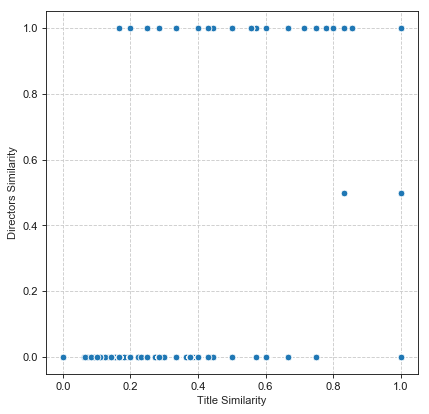

In [49]:
# scatterplot Title Similarity vs Directors Similarity
# define the figure
fig_similarity = plt.figure(figsize = (6, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')

# add the scatterplot
sns.scatterplot(x = 'Title_similarity', y = 'Directors_similarity', data = similarity)

# define x axis label
plt.xlabel('Title Similarity')

# define y axis label
plt.ylabel('Directors Similarity')

# show the figure
plt.show(fig_similarity)

In [50]:
# confirm if the records where Title Similarity < 1 and Directors Similarity > 0 are a real match
movies_final[(movies_final['Title_similarity'] < 1) & (movies_final['Directors_similarity'] > 0)]\
                [['Title', 'Directors', 'Year', 'Genre', 'Duration', 'CINEPT_title', \
                  'CINEPT_directors', 'Title_similarity', 'Directors_similarity']]

,Title,Directors,Year,Genre,Duration,CINEPT_title,CINEPT_directors,Title_similarity,Directors_similarity
610,O Estado das Coisas,[Wim Wenders],1982,[Drama],NaN,O Estado das Coisas - Der Stand der Dinge,[Wim Wenders],0.400000,1.0
652,Atlântida: Do Outro Lado do Espelho,[Daniel Del Negro],1985,"[Drama, Fantasy]",100.0,Do Outro Lado do Espelho - Atlântida,[Daniel Del-Negro],0.750000,1.0
690,O Desejado,[Paulo Rocha],1987,[Drama],117.0,O Indesejado,[Paulo Rocha],0.500000,1.0
710,Tempos Difíceis,[João Botelho],1988,[Drama],90.0,Tempos Difíceis - Este Tempo,[João Botelho],0.333333,1.0
747,"'Non', ou A Vã Glória de Mandar",[Manoel de Oliveira],1990,"[Drama, History, War]",110.0,Non ou a Vã Glória de Mandar,[Manoel de Oliveira],0.833333,1.0
962,O Testamento do Senhor Napumoceno,[Francisco Manso],1997,[Drama],117.0,O Testamento do Senhor Napumoceno da Silva Araújo,[Francisco Manso],0.714286,1.0
1018,Nice - À propos de Jean Vigo,[Manoel de Oliveira],1983,[Documentary],58.0,Nice... À Propos de Jean Vigo,[Manoel de Oliveira],0.571429,1.0
1031,"Gérard, Fotógrafo",[Fernando Lopes],1998,"[Documentary, Biography]",NaN,Olhar / Ver - Gérard Fotógrafo,[Fernando Lopes],0.285714,1.0
1042,Respirar (Debaixo D'água),[António Ferreira],2000,"[Drama, Thriller]",45.0,Respirar (Debaixo de Água),[António Ferreira],0.333333,1.0
1383,A Janela (Maryalva Mix),[Edgar Pêra],2001,[Comedy],104.0,A Janela - Maryalva Mix,[Edgar Pêra],0.333333,1.0


From the list above it is possible to observe that the record where the similarity score on `Title` is not perfect ( $\lt$ 1) but have a similarity score on the list of `Directors` that is $\gt$ 0 are in fact a real match.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="merging_fill"></a>
### 5.3 - Append the missing data & highlight PT movies

It was also possible to use the similarity results to fill in the missing data for the `Duration` field, (whenever applicable) and derive a new field, `Origin`, to label the movies as Portuguese or Other (the match will only occur if the movie is Portuguese).

In [51]:
IMDB_id = []
Origin = []

for idx, row in movies_final.iterrows(): # iterate through all records on movies_final
    IMDB_id.append(row['IMDB_ID'])
    Origin_temp = 'Other' # by default assign Other label (Origin)
    
    # check if there was a match 
    # (either a perfect match on the Title field or the condition checked previously is true)
    if((row['Title_similarity'] == 1) | ((row['Title_similarity'] < 1) & (row['Directors_similarity'] > 0))):
        Origin_temp = 'PT' # assign PT label (Origin)
        
        # check for missing values on Duration (and if available on CINEPT dataset then append 
        # it to the movies_final dataset)
        if(np.isnan(row['Duration'])):
            CINEPT_row_temp = moviesCINEPT[moviesCINEPT['Title'] == row['CINEPT_title']].index
            Duration_temp = moviesCINEPT['Duration'].iloc[CINEPT_row_temp].iloc[0]
            if(not np.isnan(Duration_temp)):
                movies_final.loc[idx, 'Duration'] = Duration_temp

    Origin.append(Origin_temp)

origin = pd.DataFrame(
    {'IMDB_ID': IMDB_id,
     'Origin': Origin
    })

# merge the two datasets using the IMDB_ID field
movies_final = pd.merge(movies_final, origin, how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
movies_final.head()

,IMDB_ID,Screenings,Admissions,GBO,Title,Year,YearPT,Score,Genre,Directors,Stars,Duration,YearPT_dt,CINEPT_title,CINEPT_directors,Title_similarity,Directors_similarity,Origin
0,tt0003419,1,34,118.0,Der Student von Prag,1913,22 August 1913,6.6,"[Drama, Fantasy, Horror]","[Paul Wegener, Stellan Rye]","[Paul Wegener, Grete Berger, Lyda Salmonova]",41.0,1913-08-22,,,0.00,0.0,Other
1,tt0004707,1,38,0.0,As Bodas de Charlot,1914,21 December 1914,7.0,[Comedy],"[Mack Sennett, Charles Bennett]","[Charles Chaplin, Marie Dressler, Mabel Normand]",74.0,1914-12-21,As Vindimas do Douro,[Simbolino Gouveia],0.25,0.0,Other
2,tt0006414,1,41,0.0,Charlot Maquinista,1916,13 November 1916,7.0,"[Short, Comedy, Romance]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1916-11-13,Cardo as Charlot no Politeama,[Ernesto de Albuquerque],0.20,0.0,Other
3,tt0007880,2,125,0.0,Charlot na Rua da Paz,1917,22 January 1917,7.6,"[Short, Comedy]",[Charles Chaplin],"[Charles Chaplin, Edna Purviance, Eric Campbell]",23.0,1917-01-22,A Festa na Amadora,[Ernesto de Albuquerque],0.25,0.0,Other
4,tt0009193,1,182,0.0,O Homem dos Olhos Tortos,1918,nan,6.1,"[Crime, Thriller]",[José Leitão de Barros],"[Raquel Barros, Alda de Aguiar, Raul de Oliveira]",92.0,NaT,O Homem dos Olhos Tortos,[Leitão de Barros],1.00,0.0,PT


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="data_visualization"></a>
## 6 - Data Visualization

Before moving on to interpreting the final dataset, we decided to compare the distribution of `Admissions` per `Year` between non-Portuguese and Portuguese movies in order to investigate whether it follows the same pattern for both non-Portuguese and Portuguese Movies.

<a class="anchor" id="visualization_admissions"></a>
### 6.1 - Movie Admissions by Year (2004/2017)


In [52]:
# filter the moviesICA dataset where the movies_final Origin field in equal to Other
admissions_by_year = pd.merge(moviesICA, movies_final[movies_final['Origin'] == 'Other'][['IMDB_ID']],\
                              how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')

# group all results by Exhibition Year
admissions_by_year = admissions_by_year.groupby(['Exhibition_Year']).sum()\
    .reset_index()[['Exhibition_Year','Screenings', 'Admissions', 'GBO']]

# do not consider 2018 (as the dataset is not complete for this year on the source)
admissions_by_year = admissions_by_year[admissions_by_year['Exhibition_Year'] < 2018]



# filter the moviesICA dataset where the movies_final Origin field in equal to PT
admissions_by_year_PT = pd.merge(moviesICA, movies_final[movies_final['Origin'] == 'PT'][['IMDB_ID']],\
                                how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')

# group all results by Exhibition Year
admissions_by_year_PT = admissions_by_year_PT.groupby(['Exhibition_Year']).sum()\
    .reset_index()[['Exhibition_Year','Screenings', 'Admissions', 'GBO']]

# do not consider 2018 (as the dataset is not complete for this year on the source)
admissions_by_year_PT = admissions_by_year_PT[admissions_by_year_PT['Exhibition_Year'] < 2018]

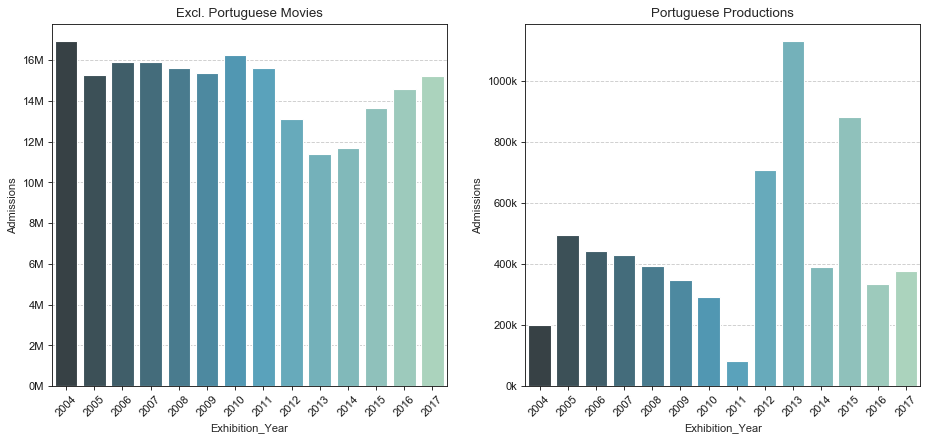

In [53]:
palette = sns.color_palette('GnBu_d', 14)
# make a side by side bar plot Admissions vs Exhibition Year
fig_AdmissionsY = plt.figure(figsize = (14, 6), dpi = 80, constrained_layout = False)
gs_AdmissionsY = gridspec.GridSpec(nrows = 1, ncols = 2, hspace = .25, wspace = .2,\
                        height_ratios = [1], width_ratios = [1, 1], figure = fig_AdmissionsY) # define the figure

# left: Non-Portuguese movies
axAdmissionsY_00 = plt.Subplot(fig_AdmissionsY, gs_AdmissionsY[0, 0]) # create the axis

fig_AdmissionsY.add_subplot(axAdmissionsY_00) # add the axis to the figure

sns.barplot(x = 'Exhibition_Year', y = 'Admissions', data = admissions_by_year, ax = axAdmissionsY_00,\
            palette = palette).set_title('Excl. Portuguese Movies') # build the barplot

# ajust the y labels (to M format)
axAdmissionsY_00.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}M'.format(y / 1e6)))
# rotate the x labeld by 45º
plt.setp(axAdmissionsY_00.get_xticklabels(), **{'rotation': 45}) 

# Right: Portuguese movies
axAdmissionsY_01 = plt.Subplot(fig_AdmissionsY, gs_AdmissionsY[0, 1]) # create the axis
fig_AdmissionsY.add_subplot(axAdmissionsY_01) # add the axis to the figure
sns.barplot(x = 'Exhibition_Year', y = 'Admissions', data = admissions_by_year_PT, ax = axAdmissionsY_01,
            palette = palette).set_title('Portuguese Productions') # build the barplot

# ajust the y labels (to k format)
axAdmissionsY_01.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y / 1e3)))
# rotate the x labeld by 45º
plt.setp(axAdmissionsY_01.get_xticklabels(), **{'rotation': 45})

plt.show(fig_AdmissionsY) # show the figure

>We found out that while the distribution of Admissions per Year for non-Portuguese movies is approximately uniform, the same does not apply to the Portuguese movies.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="visualization_boxoffice"></a>
### 6.2 - Portuguese Productions Box Office Hits "Effect" by Year (2004/2017)
In the previous analysis we learnt that, unlike international movies, the distribution of `Admissions` for Portuguese movies is made of ups and downs. Could these fluctuations be explained by the number of movies released in each of the years analysed? Or should they be explained by the release of a few very popular movies?

In [54]:
# filter the moviesICA dataset where the movies_final Origin field in equal to PT
admissions_by_year_PT_movies = pd.merge(moviesICA, movies_final[movies_final['Origin'] == 'PT'][['IMDB_ID']],\
                                        how = 'inner', left_on = 'IMDB_ID', right_on = 'IMDB_ID')

# do not consider 2018 (as the dataset is not complete for this year on the source)
admissions_by_year_PT_movies = admissions_by_year_PT_movies[admissions_by_year_PT_movies['Exhibition_Year'] < 2018]

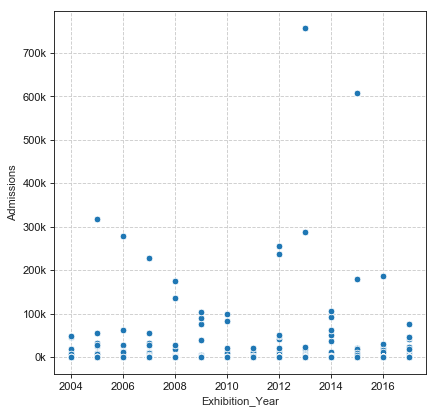

In [55]:
# define the figure
fig_PTboxoffice = plt.figure(figsize = (6, 6), dpi = 80) 

# create the axis with the scatterplot
axPTboxoffice = sns.scatterplot(x = 'Exhibition_Year', y = 'Admissions', data = admissions_by_year_PT_movies)

# ajust the y labels (to k format)
axPTboxoffice.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y / 1e3)))

# show the figure
plt.show(fig_PTboxoffice) 

>We can definitely see that there are a few popular movies (Box Office Hits) with significant impact on the number of Admissions, which explain the previous yearly distribution.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="interpreting_data"></a>
## 7 - Interpreting Data

Having our dataset already settled, we proceeded  to an analysis of the chosen variables: `Admissions`, `GBO`, `Duration`, `Score`, `Genre`, `Stars` and `Directors`. The goal of such analysis was to determine whether the above-mentioned variables are explanatory of the success of a Portuguese movie.

<a class="anchor" id="filtering"></a>
### 7.1 - Filtering

Since the focus of our project is the Portuguese cinema, we should filter the dataset to only include Portuguese movies. To do so, we used the variable `Origin` previously defined.

In [56]:
movies_final_PT = movies_final[movies_final['Origin'] == 'PT']

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="admissions_duration"></a>
#### 7.1.1 - `Admissions` vs `Duration`

We carried out an analysis of the relationship between variables `Admissions` and `Duration` using the filtered dataset.

<Figure size 480x480 with 0 Axes>

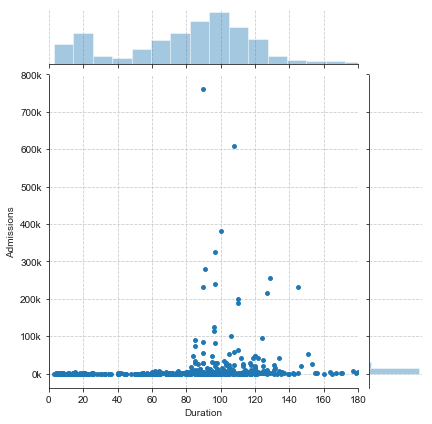

In [58]:
# define the figure
fig_Adm_Duration_PT = plt.figure(figsize = (6, 6), dpi = 80)

# create the axis with the jointplot
axAdm_Duration_PT = sns.jointplot(x = 'Duration', y = 'Admissions', data = movies_final_PT, xlim = (0, 180), s = 15)

# ajust the y labels (to k format)
axAdm_Duration_PT.ax_marg_y.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                pos: '{:.0f}k'.format(y / 1e3)))
# show the figure
plt.show(fig_Adm_Duration_PT)

>The results above led us to conclude that popularity is higher for movies which duration falls between the 80 to 160 minutes range.

In [59]:
# excludes all movies which duration falls out of the 80 to 160 minutes range
movies_final_PT = movies_final_PT[movies_final_PT['Duration'] > 80]
movies_final_PT = movies_final_PT[movies_final_PT['Duration'] < 160]

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="admissions_score"></a>
#### 7.1.2 - `Admissions` vs `Score`

Secondly, we carried out an analysis to determine whether User Ratings of a well-known platform called IMDB, `Score` have an impact on the number of `Admissions`.

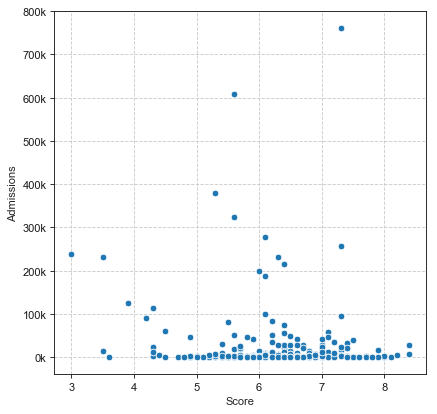

In [60]:
# define the figure
fig_Adm_Score = plt.figure(figsize = (6, 6), dpi = 80)

# create the axis with the scatterplot
axAdm_Score = sns.scatterplot(x = 'Score', y = 'Admissions', data = movies_final_PT)

# ajust the y labels (to k format)
axAdm_Score.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y / 1e3)))

# show the figure
plt.show(fig_Adm_Score)

>From the results above, we can conclude that the level of correlation between the variables Admissions and Score is quite low and, therefore, the variable Score is not statistically significant and should be excluded from the analysis. 

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="admissions_GBO"></a>
#### 7.1.3 - `Admissions` vs `GBO`

In order to study the level of success of a movie, we decided that the dataset should be restricted to a certain number of Admissions. To do so, we apply a logarithm to the variable `Admissions` as can be seen below. 

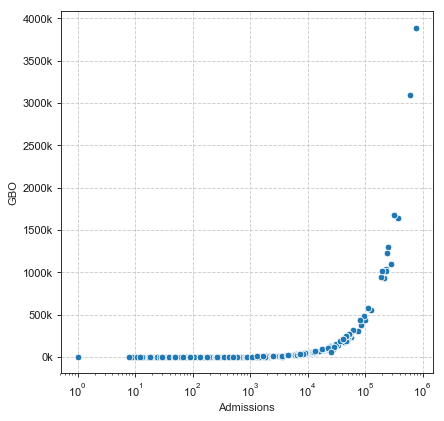

In [61]:
# define the figure
fig_Adm_GBO = plt.figure(figsize = (6, 6), dpi = 80)

# create the axis with the scatterplot
axAdm_GBO= sns.scatterplot(x = 'Admissions', y = 'GBO', data = movies_final_PT)

# ajust the y labels (to k format)
axAdm_GBO.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y / 1e3)))

# apply the log scale on the x-axis
axAdm_GBO.set_xscale('log')

# show the figure
plt.show(fig_Adm_GBO)

From the results above, it is clear that only movies with Admissions higher than 10 000 should be considered.

In [62]:
# excludes all movies which number of Admissions is below 10 000.
movies_final_PT = movies_final_PT[movies_final_PT['Admissions'] > 10000]

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="genre_analysis"></a>
### 7.2 - Genre Analysis


Moving forward, we decided to take a deeper look at the impact of Genre on attracting viewers.
As you may know, some movies are classified into more than one Genre. For this reason, we were forced to unfold the dataset according to the variable `Genre`.

In [63]:
# unfolds the movies_final_PT dataset according to the variable Genre to build the Movies_Genre dataset
Movies_Genre = movies_final_PT.apply(lambda x: pd.Series(x['Genre']), axis = 1)\
.merge(movies_final_PT, right_index = True, left_index = True)\
.drop(['Screenings', 'Admissions', 'GBO', 'Title', 'Year', 'YearPT', 'Score',\
       'Directors', 'Stars', 'Duration', 'YearPT_dt',\
       'CINEPT_title', 'CINEPT_directors', 'Title_similarity', 'Directors_similarity', 'Origin'], axis = 1)\
.melt(id_vars = ['IMDB_ID'], value_name = "Genre")\
.drop(['variable'], axis = 1)\
.dropna()

# drops records with '[]'
Movies_Genre = Movies_Genre[~Movies_Genre['Genre'].astype(str).str.startswith('[')]

In [64]:
Movies_Genre.head()

,IMDB_ID,Genre
0,tt0166871,Comedy
1,tt0406669,Drama
2,tt0411665,Drama
3,tt0413053,Drama
4,tt0414851,Adventure


In [65]:
# append Admissions to the Movies_Genre dataset
genre_columns = movies_final_PT[['IMDB_ID', 'Admissions']]
genre_data = pd.merge(Movies_Genre, genre_columns, how = 'left', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
genre_data.head(n = 10)

,IMDB_ID,Genre,Admissions
0,tt0166871,Comedy,13422
1,tt0406669,Drama,14665
2,tt0411665,Drama,20658
3,tt0413053,Drama,13474
4,tt0414851,Adventure,57610
5,tt0420211,Mystery,74095
6,tt0422648,Documentary,15881
7,tt0438893,Drama,19107
8,tt0450470,Drama,15216
9,tt0457182,Crime,28570


<p><b>List of Genres</b></p> 
A necessary step was to identify all the different Genres present in the dataset. A summary table of these Genres and a few statistics is shown below.

In [66]:
# do some statistics on the Admissions by Genre
genre_describe = genre_data.groupby(['Genre'])['Admissions'].describe()
genre_describe

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,7.0,109632.428571,147439.644287,13627.0,20883.00,29361.0,151001.00,380671.0
Adventure,7.0,80165.000000,85371.496912,22557.0,26185.00,47501.0,91274.00,256179.0
Biography,6.0,62481.833333,75316.326948,15890.0,27751.00,35546.5,44992.75,214614.0
Comedy,27.0,137377.481481,184318.336967,11726.0,21171.50,57610.0,193360.50,761113.0
Crime,12.0,69951.416667,77303.715973,13474.0,29163.25,39368.0,61731.25,232581.0
Documentary,4.0,23387.750000,9119.999794,15881.0,15887.75,21644.0,29144.00,34382.0
Drama,44.0,76155.022727,131422.749776,10834.0,19058.00,31549.0,52758.75,761113.0
Family,1.0,238323.000000,NaN,238323.0,238323.00,238323.0,238323.00,238323.0
History,2.0,40078.000000,15935.358421,28810.0,34444.00,40078.0,45712.00,51346.0


In [67]:
# count the number of movies per Genre
# get the number of Genres
n_genres = np.shape(genre_describe)[0]

# build a zero DataFrame with size equal to the number of Genres
genre_matrix = pd.DataFrame(np.zeros(shape = (1, n_genres))) 

# list the Genres in descending order by movie counts
genre_order = genre_describe.sort_values(by = 'count', ascending = False, axis = 0).index.tolist() 
for index, g in enumerate(genre_order): # iterate through each Genre in list
    genre_matrix[index] = eval('genre_describe.loc[' + '\'' + g + '\'' + '][0]') # get the movie count for each Genre

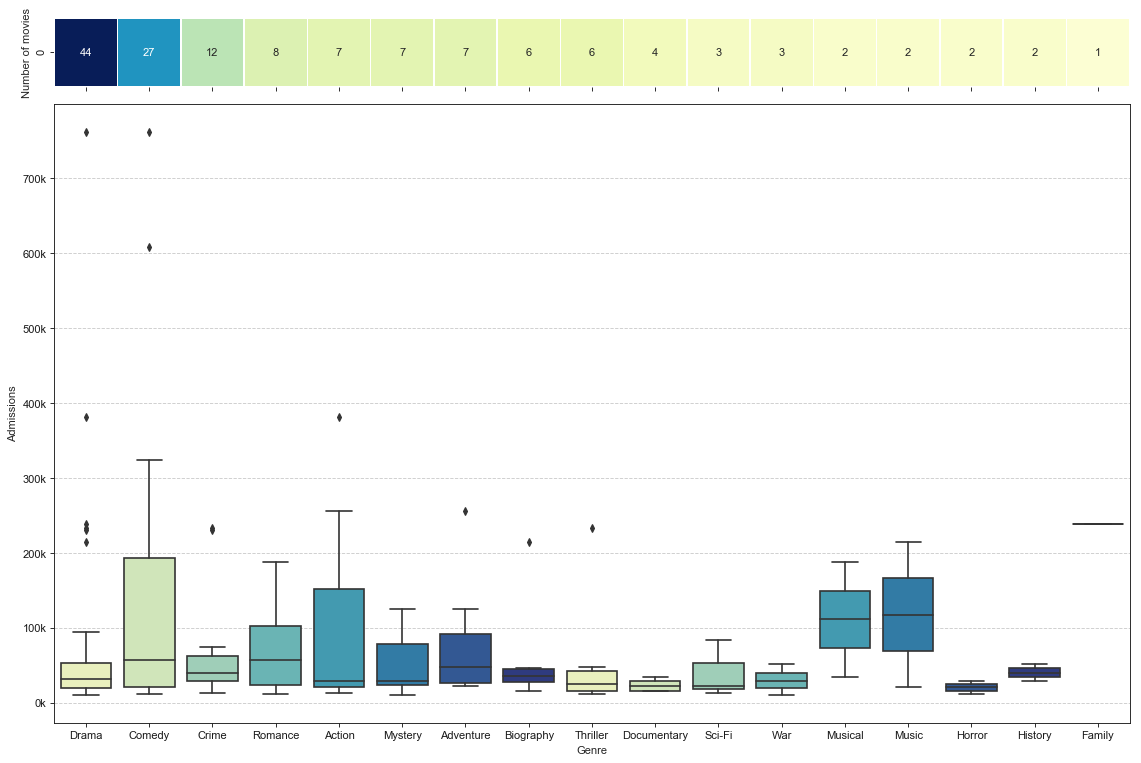

In [68]:
# combined plot (heatmap + boxplot for Admissions vs Genre)
fig_Gen_Adm = plt.figure(figsize = (14, 9), dpi = 80)
plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .98, wspace = .3, hspace = .05) # define the figure

# define a GridSpec to divide the figure (2 rows per 1 column)
gsGen_Adm = gridspec.GridSpec(nrows = 2, ncols = 1, height_ratios = [0.1, 0.9], figure = fig_Gen_Adm)

# heatmap
axGen_Adm_hmap00 = plt.subplot(gsGen_Adm[0, 0]) # create the axis (on the first row)
fig_Gen_Adm .add_subplot(axGen_Adm_hmap00, sharex = True) # add the axis to the figure

sns.heatmap(genre_matrix,  annot = True, fmt = '.0f', cmap = 'YlGnBu',\
                        vmin = 0, vmax = genre_describe['count'].max(),\
            linewidths = .5, cbar_kws = {'shrink': .75}, cbar = False, ax = axGen_Adm_hmap00) # build the heatmap

# remove x labels
axGen_Adm_hmap00.tick_params(labelbottom = False)
axGen_Adm_hmap00.set_xlabel('')
# set the y label
axGen_Adm_hmap00.set_ylabel('Number of movies')

#box plot
axGen_Adm_box01 = plt.subplot(gsGen_Adm[1, 0]) # create the axis (on the second row)
fig_Gen_Adm.add_subplot(axGen_Adm_box01) # add the axis to the figure

palette_genre = sns.color_palette('YlGnBu', np.shape(genre_describe)[1])
sns.boxplot(x = 'Genre', y = 'Admissions' , data = genre_data,  ax = axGen_Adm_box01, palette = palette_genre, \
            order = genre_order) # build the boxplot

# ajust the y labels (to k format)
axGen_Adm_box01.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y / 1e3)))

# show the figure
plt.show(fig_Gen_Adm)

<a class="anchor" id="genre_insights"></a>
<p><b>Key Insights</b></p>

>The plot above depicts the distribution of Genres per number of movies under the conditions set down before, highlighting that Drama and Comedy movies are the most common.

>An analysis of the different Boxplots found evidence of a clear preference towards Drama and Comedy movies since the movies with higher audience are classified into these Genres, being very significant outliers. Apart from these, a few other Genres, such as Action, Adventure, Crime and Thriller, are also very much appreciated by viewers. The least popular Genres were found to be Documentary, Horror and War.

>Regarding Family movies, we would like to note that, even though the number of Admissions is quite high, the sample is composed of only 1 movie and, for that reason, no conclusion should be drawn. Additionally, it remains unclear whether there is a preference towards Music over Musical because these are often complementary Genres and the samples are, once again, small.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="stars_analysis"></a>
### 7.3 - Stars Analysis

In addition, we decided to take a look at the influence of the popularity of Stars in attracting viewers.
Our Dataset includes several actors for each movie, which led us to unfold the dataset according to the variable Stars.

In [69]:
# unfolds the movies_final_PT dataset according to the variable Stars to build the Movies_Stars dataset
Movies_Stars = movies_final_PT.apply(lambda x: pd.Series(x['Stars']), axis = 1)\
.merge(movies_final_PT, right_index = True, left_index = True)\
.drop(['Screenings', 'Admissions', 'GBO', 'Title', 'Year', 'YearPT', 'Score', \
       'Genre', 'Directors', 'Duration', 'YearPT_dt',\
       'CINEPT_title', 'CINEPT_directors', 'Title_similarity', 'Directors_similarity', 'Origin'], axis = 1)\
.melt(id_vars = ['IMDB_ID'], value_name = 'Stars')\
.drop(['variable'], axis = 1)\
.dropna()

# drop records with '[]'
Movies_Stars = Movies_Stars[~Movies_Stars['Stars'].astype(str).str.startswith('[')]

In [70]:
# append Admissions, Genre and Title to the stars_data
Stars_columns = movies_final_PT[['IMDB_ID', 'Admissions', 'Genre', 'Title']]
Stars_data = pd.merge(Movies_Stars, Stars_columns, how = 'left', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
Stars_data.head(n = 10)

,IMDB_ID,Stars,Admissions,Genre,Title
0,tt0166871,Bianca Byington,13422,"[Comedy, Drama]",Viúva Rica Solteira Não Fica
1,tt0406669,Beatriz Batarda,14665,[Drama],A Costa dos Murmúrios
2,tt0411665,Nicolau Breyner,20658,[Drama],O Milagre segundo Salomé
3,tt0413053,Fernando Luís,13474,"[Drama, Crime]",Noite Escura
4,tt0414851,Jorge Neto,57610,"[Adventure, Comedy, Crime]",Balas & Bolinhos - O Regresso
5,tt0420211,Helder Mendes,74095,"[Mystery, Crime]",Sorte Nula
6,tt0422648,,15881,[Documentary],Lisboetas
7,tt0438893,Marisa Cruz,19107,[Drama],Kiss Me
8,tt0450470,Ana Cristina de Oliveira,15216,[Drama],Odete
9,tt0457182,Joaquim de Almeida,28570,"[Crime, Thriller, Drama]",Um Tiro no Escuro


Are there records without Stars?

In [71]:
Stars_data[Stars_data['Stars'] == '']

,IMDB_ID,Stars,Admissions,Genre,Title
6,tt0422648,,15881,[Documentary],Lisboetas


We need to drop that record.

In [72]:
Stars_data = Stars_data[Stars_data['Stars'] != '']
Stars_data.head()

,IMDB_ID,Stars,Admissions,Genre,Title
0,tt0166871,Bianca Byington,13422,"[Comedy, Drama]",Viúva Rica Solteira Não Fica
1,tt0406669,Beatriz Batarda,14665,[Drama],A Costa dos Murmúrios
2,tt0411665,Nicolau Breyner,20658,[Drama],O Milagre segundo Salomé
3,tt0413053,Fernando Luís,13474,"[Drama, Crime]",Noite Escura
4,tt0414851,Jorge Neto,57610,"[Adventure, Comedy, Crime]",Balas & Bolinhos - O Regresso


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="network_plot"></a>
#### 7.3.1 - Network Plot (for Movie Stars)

The main goal of the Stars analysis is to investigate whether they have an influence in determining the success of a movie and a possible interaction between them when co-starring. To do so, we chose to depict a network plot, using the capabilities of HoloViews phyton library, where the nodes represent the Stars (size varies with number of movies) and the edges represent movies (thickness varies with the number of `Admissions`).

In [73]:
# Install some additional non-standard libraries required (used to create a network plot and visualize it)
# ... this will only work if an Anaconda Phyton distribution is installed!
import sys
!conda install --yes --prefix {sys.prefix} holoviews bokeh
!{sys.executable} -m pip install xarray
!{sys.executable} -m pip install datashader

Solving environment: ...working... done

# All requested packages already installed.



In [74]:
# Import the non-standard libraries
import networkx as nx 
import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import datashade, bundle_graph
from bokeh.models import HoverTool
from bokeh.models import Legend

<p><b>Nodes</b></p>

In [75]:
# build the nodes DataFrame to be used on the network plot (starting from the Stars dataset)
nodes = pd.DataFrame(Stars_data['Stars'])
nodes.columns = ['name']
nodes = nodes.drop_duplicates(subset = 'name', keep = 'first')

# count the number of movies that each Star has participated
movies_count_list = []
for index, star in nodes.iterrows():
    movies_count_list.append(Stars_data[Stars_data['Stars'] == star['name']]['IMDB_ID'].count() * 5)

# add the count to the nodes DataFrame for the nodesize propriety
nodes['nodesize'] = movies_count_list
nodes.head()

,name,nodesize
0,Bianca Byington,5
1,Beatriz Batarda,15
2,Nicolau Breyner,25
3,Fernando Luís,5
4,Jorge Neto,10


<p><b>Edges</b></p>

In [76]:
# build the edges DataFrame to be used on the network plot (starting from the Stars datset)
# ....this will require that for each movie where a Star has participated with another one a new edge will be defined

# create the lists to build the dataset afterwards
list_source = []
list_target = []
list_value = []

for index, movie in movies_final_PT.iterrows(): # iterate through each movie from movies_final_PT dataset
    stars_list = movie['Stars'] # get the list of Stars that participated on each movie
    pos = 0 
    for pos in range(pos, len(stars_list)): # iterate through each Star on that list
        # for each Start iterate again through the Stars on that list (make the connections)
        for idx in enumerate(stars_list): 
            if(idx[0] > pos): # avoid building edges connecting the same Star
                list_source.append(stars_list[pos]) # set the source Star as the one for the first for loop
                list_target.append(stars_list[idx[0]]) # set the target Star as the one for the second loop
                list_value.append(movie['Admissions']) # set the value as the field movie Admissions
        pos = pos + 1

# build the pandas DataFrame from the lists
edges = pd.DataFrame(
    {'source': list_source,
     'target': list_target,
     'value': list_value
    })
edges.head()

,source,target,value
0,Bianca Byington,Cucha Carvalheiro,13422
1,Bianca Byington,José Raposo,13422
2,Cucha Carvalheiro,José Raposo,13422
3,Beatriz Batarda,Filipe Duarte,14665
4,Beatriz Batarda,Monica Calle,14665


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
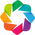

:Overlay
   .Graph.I  :Graph   [start,end]   (weight)
   .Labels.I :Labels   [x,y]   (node_labels)

In [115]:
# use bokeh as the visualization library to be used with HoloViews
hv.extension('bokeh')

# set some aspect definitions for the plot
kwargs = dict(width = 900, height = 700, xaxis = None, yaxis = None)
hv.opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

# initialize the network plot (empty object)
NetworkPlot = nx.Graph()

# add the nodes to the network plot (and their proprieties)
for index, row in nodes.iterrows():
    NetworkPlot.add_node(row['name'], nodesize = row['nodesize'], node_labels = row['name'])
    
# add the edges to the network plot (and their proprieties)
for index, row in edges.iterrows():
    NetworkPlot.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

# define the color schema
colors = ['#000000'] + hv.Cycle('Category20').values

# define the network plot
fb_graph = hv.Graph.from_networkx(NetworkPlot, nx.layout.circular_layout, scale = 1)\
    .opts(edge_line_color = 'black', edge_line_width = 1.5, node_size = 'nodesize', node_line_color = 'gray',
          title = 'Network plot (Nodes: Stars | Edges: Movie Admissions)', xlim = (-1.1, 1.1), ylim = (-1.1, 1.1))

# set the tooltips as the node_labels corresponding to the Star name
tooltips = [
    ('Star', '@node_labels')
]
labels = hv.Labels(fb_graph.nodes, ['x', 'y'], 'node_labels')

# define hover options (the plot is interactive and it is possible to retrieve more info just by hoovering on any node)
hover = HoverTool(tooltips = tooltips)

# bundle the edges to make them smoother for visualization
bundled = bundle_graph(fb_graph).opts(opts.Graph(tools = [hover]))
bundled.opts(toolbar = 'above')
(bundled * labels.opts(text_font_size = '0pt', text_color = 'black', bgcolor = 'white'))

<a class="anchor" id="stars_insights"></a>
<p><b>Key Insights</b></p>

>The network above provides evidence of a strong correlation between the interaction of certain Stars and the success of a movie, measured by the thickness of the edges connecting the Stars. Moreover it shows that there are a few actors (Rita Blanco, Soraia Chaves, Ivo Canelas and Nicolau Breyner) who can usually be seen on Portuguese blockbusters.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="directors_analysis"></a>
### 7.4 - Directors Analysis

Finally, we could not end our analysis without investigating the possible influence of the popularity of the Director in attracting viewers.
Similarly to what happens with Genres and Stars, some movies have more than one Director. Thus, we were forced to unfold the dataset according to the variable Directors.

In [78]:
# unfolds the movies_final_PT dataset according to the variable Directors to build the Movies_Directors dataset
Movies_Directors = movies_final_PT.apply(lambda x: pd.Series(x['Directors']), axis = 1)\
.merge(movies_final_PT, right_index = True, left_index = True)\
.drop(['Screenings', 'Admissions', 'GBO', 'Title', 'Year', 'YearPT', 'Score', 'Genre', 'Stars',\
       'Duration', 'YearPT_dt', 'CINEPT_title', 'CINEPT_directors', 'Title_similarity',\
       'Directors_similarity', 'Origin'], axis = 1).melt(id_vars = ['IMDB_ID'], value_name = 'Directors')\
.drop(['variable'], axis = 1).dropna()

# drops records with '[]'
Movies_Directors = Movies_Directors[~(Movies_Directors['Directors'].astype(str).str.startswith('['))]                                      
Movies_Directors.head(n = 10)

,IMDB_ID,Directors
0,tt0166871,José Fonseca e Costa
1,tt0406669,Margarida Cardoso
2,tt0411665,Mário Barroso
3,tt0413053,João Canijo
4,tt0414851,Luis Ismael
5,tt0420211,Fernando Fragata
6,tt0422648,Sérgio Tréfaut
7,tt0438893,António da Cunha Telles
8,tt0450470,João Pedro Rodrigues
9,tt0457182,Leonel Vieira


In [79]:
# append Admissions to the Directors_data
Directors_columns = movies_final_PT[['IMDB_ID', 'Admissions']]
Directors_data = pd.merge(Movies_Directors, Directors_columns, how = 'left', left_on = 'IMDB_ID', right_on = 'IMDB_ID')
Directors_data.head(n = 10)

,IMDB_ID,Directors,Admissions
0,tt0166871,José Fonseca e Costa,13422
1,tt0406669,Margarida Cardoso,14665
2,tt0411665,Mário Barroso,20658
3,tt0413053,João Canijo,13474
4,tt0414851,Luis Ismael,57610
5,tt0420211,Fernando Fragata,74095
6,tt0422648,Sérgio Tréfaut,15881
7,tt0438893,António da Cunha Telles,19107
8,tt0450470,João Pedro Rodrigues,15216
9,tt0457182,Leonel Vieira,28570


Are there records without Directors?

In [80]:
Directors_data[Directors_data['Directors'] == '']

,IMDB_ID,Directors,Admissions


After having unfolded the dataset per both director and movie, we decided to regroup the dataset per director in order to get the total number of Admissions for each one ( i.e. for each director we now get the total number of admissions including the ones from movies which were co-directed).

In [81]:
# regroup the dataset
Director_grouped = Directors_data.groupby(['Directors']).sum()[['Admissions']].reset_index()\
[['Directors', 'Admissions']] 
Director_grouped.sort_values('Admissions', inplace = True, ascending = False)

# ranking of admissions in ascending order
Director_grouped['Admissions_ranked'] = Director_grouped['Admissions'].rank(ascending = 0)
Director_grouped.head(n = 30)

,Directors,Admissions,Admissions_ranked
27,Leonel Vieira,900038,1.0
43,Ruben Alves,761113,2.0
5,Carlos Coelho da Silva,720223,3.0
3,António-Pedro Vasconcelos,503243,4.0
29,Luis Ismael,359612,5.0
40,Nicolau Breyner,324113,6.0
23,João Botelho,282206,7.0
22,José Sacramento,278956,8.0
15,Hugo de Sousa,238323,9.0
17,Joaquim Leitão,195692,10.0


The results demonstrated that the number of Admissions varies a lot between Directors and, as a consequence, we restricted the analysis to the top 20.

In [82]:
Director_grouped = Director_grouped[Director_grouped['Admissions_ranked'] <= 20]

In [83]:
# define some helpful variables for the boxplot
# visual options
boxprops = dict(alpha = 0.85, linewidth = 1.0)
whiskerprops = dict(color = 'black', linewidth = 1.0, linestyle = '--')
capprops = dict(color = 'red', linewidth = 2.0)
medianprops = dict(color = 'red', linewidth = 1.0)
flierprops = dict(color = 'black', markeredgecolor = 'black', markerfacecolor = 'white',\
                              linewidth = 0.5, markersize = 4.0, marker = 'd')
whis = 1.5

# define some helpful functions for the boxplot
def f_find_nearest_Lmax(var_in, threshold_in):
    """This function determines the closest observation to a certain input threshold for the whisker higher limit"""
    
    var = var_in.sort_values(ascending = False)
    if(threshold_in >= var.iloc[0]):
        return var.iloc[0]
    else:
        idx = (var - threshold_in).le(0).idxmax()
        return var_in[idx]

def f_find_nearest_Lmin(var_in, threshold_in):
    """This function determines the closest observation to a certain input threshold for the whisker lower limit"""
    
    var = var_in.sort_values(ascending = True)
    if(threshold_in <= var.iloc[0]):
        return var.iloc[0]
    else:
        idx = (threshold_in - var).le(0).idxmax()
        return var_in[idx]

def f_stats_boxplot(var_in):
    """This function determines the statistics that are typically represented on a box plot"""

    median = var_in.median()
    IQR = sp.stats.iqr(var_in)
    Q1 = np.percentile(var_in, 25)
    Q3 = np.percentile(var_in, 75)
    lim1 = f_find_nearest_Lmin(var_in, Q1 - whis * IQR) # this will get the closes observation to the Q1 - whis * IQR 
    lim2 = f_find_nearest_Lmax(var_in, Q3 + whis * IQR) # this will get the closes observation to the Q3 + whis * IQR 
    return (IQR, lim1, Q1, median, Q3, lim2)

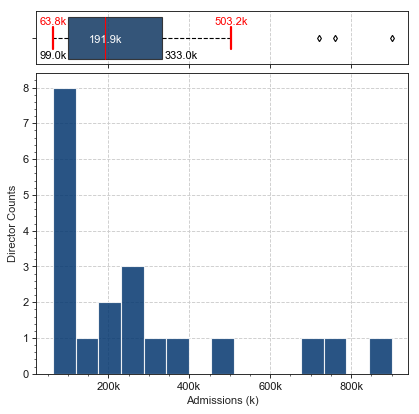

In [84]:
fig_DirectorAdm = plt.figure(figsize = (6, 6), dpi = 80, facecolor = 'w', edgecolor = 'k', constrained_layout = False)
gs_DirectorAdm = gridspec.GridSpec(nrows = 2, ncols = 1,  hspace = .05, wspace = .2,\
                        height_ratios = [.15, .85], width_ratios = [1], figure = fig_DirectorAdm) # define the figure


# boxplot
axDirectorAdm_00 = plt.Subplot(fig_DirectorAdm, gs_DirectorAdm[0, 0]) # create the axis (on the first row)
fig_DirectorAdm.add_subplot(axDirectorAdm_00 , sharex = True) # add the axis to the figure

sns.boxplot(Director_grouped['Admissions'], color = '#03366f', boxprops = boxprops,\
            whiskerprops = whiskerprops, capprops = capprops,\
            medianprops = medianprops, flierprops = flierprops, whis = whis,\
            ax = axDirectorAdm_00).set_title('', size = 14)
axDirectorAdm_00.tick_params(labelbottom = False) # build the boxplot
axDirectorAdm_00.set_xlabel('') # remove the x label

stats = f_stats_boxplot(Director_grouped['Admissions']) # get the statistics from the data
# add the statistics to the plot
axDirectorAdm_00.text(stats[1], -.25, '{:.1f}k'.format(stats[1] / 1e3), color = 'red', ha = 'center')
axDirectorAdm_00.text(stats[2] - 0.15 * stats[0], .4, '{:.1f}k'.format(stats[2] / 1e3), color = 'black', ha = 'center')
axDirectorAdm_00.text(stats[3], .1, '{:.1f}k'.format(stats[3] / 1e3), color = 'white', ha = 'center')
axDirectorAdm_00.text(stats[4] + 0.2 * stats[0], .4, '{:.1f}k'.format(stats[4] / 1e3), color = 'black', ha = 'center')
axDirectorAdm_00.text(stats[5], -.25, '{:.1f}k'.format(stats[5] / 1e3), color = 'red', ha = 'center')

# histogram
axDirectorAdm_10 = plt.Subplot(fig_DirectorAdm, gs_DirectorAdm[1, 0]) # create the axis (on the second row)
fig_DirectorAdm.add_subplot(axDirectorAdm_10) # add the axis to the figure

sns.distplot(Director_grouped['Admissions'], kde = False, rug = False, bins = 15,\
                 color = '#03366f', hist_kws = {'alpha': .85}, ax = axDirectorAdm_10)  # build the histogram

# set the x label
axDirectorAdm_10.set_xlabel('Admissions (k)')

# adjust the x labels (to M format)
axDirectorAdm_10.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x / 1e3)))

# set the y label
axDirectorAdm_10.set_ylabel('Director Counts')

# adjust the axis tick locations
axDirectorAdm_10.get_xaxis().set_minor_locator(mtick.AutoMinorLocator())
axDirectorAdm_10.get_yaxis().set_minor_locator(mtick.AutoMinorLocator())


# show the figure
plt.show(fig_DirectorAdm)

In [85]:
# get tge top 4 Directors
Director_grouped[Director_grouped['Admissions'] > 400000]

,Directors,Admissions,Admissions_ranked
27,Leonel Vieira,900038,1.0
43,Ruben Alves,761113,2.0
5,Carlos Coelho da Silva,720223,3.0
3,António-Pedro Vasconcelos,503243,4.0


<a class="anchor" id="directors_insights"></a>
<p><b>Key Insights</b></p>

> A key finding from the Histogram above is that there are 3 Directors (Leonel Vieira, Ruben Alves and Carlos Coelho da Silva) that clearly outperform the others in terms of Admissions. Besides, the Boxplot led us to conclude that these Directors should be considered "positive outliers" which is in line with our conclusions from the Histogram.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="conclusions"></a>
## 8 - Conclusions

The preparation of the data, its visualization with a wide variety of graphs, and finally the interpretation of these graphs made it possible to conduct an analysis and a global view of which variables are explanatory of the success of a Portuguese movie.

<p><b>This study through a large volume of data, allowed us to determine the following points for Portuguese movies between 2004 and 2018:</b></p>

* The distribution of Admissions per Year for non-Portuguese movies is approximately uniform, but the same does not apply to Portuguese movies.
* Movies between 80 minutes and 160 minutes are those with higher audience.
* The level of correlation between the variables Admissions and Score is low and, therefore, no inference should be made regarding the variable Score.
* Drama and Comedy movies are the most numerous.
* The movies with higher audience are classified into the following Genres: Comedy and Drama.
* The least popular Genres were found to be Documentary, Horror and War.
* There is a strong correlation between the interaction of certain Stars and the success of a movie.
* Some actors like Rita Blanco, Soraia Chaves, Ivo Canelas and Nicolau Breyner can usually be seen on Portuguese blockbusters.
* Directors like Leonel Vieira, Ruben Alves and Carlos Coelho da Silva outperform the others in terms of Admissions.

[Return to Table of Contents](#Table_Contents)